# Trabajo de especialización

## Especialización en Explotación de datos y descubrimiento de conocimiento - UBA

### Lucas Pecina - Julio 2020

## Contenido

1- Introducción y resumen del trabajo

2- Explicaciones contrafacticas
 - Que son
 - Para que sirven. Enfoques:
  - Interpretabilidad
  - Toma de decisiones

3- Ejemplo sencillo (a mano) PISA USA 09
 - problematica: complejidad

4- Explicaciones diversas
 - solucion: optimizacion
 - DiCE

5- Ejemplos de clasificacion PISA 09
 - resultados 
 
6- Aplicaciones

# 1- Resumen

El presente trabajo consiste en una introducción al tema de las **explicaciones contrafacticas de modelos estadísticos de aprendizaje automatico**, poniendo enfasis en la problematica a resolver, la importancia y utilidad de estas tecnicas y su aplicacion en el mundo real.

Se hará enfasis en demostrar que las explicaciones contrafacticas pueden ser utilizados como un complemento post-hoc de los modelos complejos de machine learning en dos grandes frentes: **la toma de decisiones a nivel individual** y la **interpretabilidad del modelo** para el análisis de sesgos.

Por último se analizará su aplicabilidad a casos puntuales de la vida real, sus limitaciones y potenciales mejoras a estos metodos.

# 2- Explicaciones contrafácticas

CONTEXTO Y PROBLEMA A RESOLVER

Existe un clasico trade-off entre la interpretabilidad y el poder predictivo de los modelos estadisticos segun su complejidad. Si optamos por utilizar modelos simples, es mas probable que logremos entender la influencia de las variables en el resultado final. Esto nos permite inferir ciertas propiedades del mundo real cuando queremos hacer investigacion cientifica o tomar decisiones basadas en dichas variables.  
Sin embargo, la simpleza de estos modelos hace que no logren captar mucha de la complejidad que tiene el mundo real, perjudicando asi el poder predictivo del modelo.

Cuando se requiere predecir con la mayor exactitud posible, se utilizan modelos complejos, los llamados black-boxes. Estos logran un mejor rendimiento pero a costas de su falta de transparencia. Por lo que si lo unico que nos interesa es obtener la probabilidad final de un resultado, los black-box son el camino a seguir. 

**Pero que pasa si se nos presenta un escenario en el cual debemos hacer predicciones correctas y a su vez entender el motivo por el cual el modelo predice dicho resultado a nivel individual?** Por ejemplo si una persona aplica para un prestamo y es rechazado por el algoritmo del banco, queremos entender por que el usuario fue rechazado y que podria haber hecho distinto para ser aprobado. Esto podria ayudar a dar recomendaciones que sirvan para informar la toma de decisiones.

En el caso de usar modelos complejos, realizaremos buenas predicciones pero a costa de no saber los motivos que llevaron a ese resultado. Si usamos modelos simples, no solo que las predicciones son menos confiables, sino que tambien encontramos otro problema: la falta de complejidad no va a permitir captar las interacciones y no linealidades que ocurren a nivel individual. Estos modelos nos pueden decir que, **en el agregado**, una variable esta relacionada positivamente con el resultado, sin embargo, no nos dirá cómo esa variable se relaciona con el resultado para cierto **individuo particular**.

Por eso es necesario tener un metodo para tomar lo mejor de los dos enfoques: aproximar una funcion lo suficientemente compleja para tener un buen poder de prediccion y, a su vez, poder apreciar los efectos de las variables en el resultado. Todo esto a nivel del individuo. Las **explicaciones contrafacticas** pueden ayudar a solucionar este problema.

INTRO ECF

Una explicacion contrafactica (ECF) describe una situacion causal de la forma "Si la situacion X hubiera sido diferente, el evento Y habria ocurrido?". La idea general es que las ECF pueden ser usadas para explicar predicciones de modelos de aprendizaje automatico complejos en instancias individuales. En este caso, el "evento" Y es el resultado predicho por el modelo dada la "situacion" X, que es el conjunto de valores que toman las variables en una instancia particular.

Cuando el modelo es un black-box, partimos de asumir que todas las variables causan la prediccion (independientemente de si hay una relacion causal en la vida real entre ellos). Luego, elegimos una instancia inicial de interes y simulamos distintos escenarios contrafacticos a partir de esa instancia, con el objetivo de analizar como cambia el resultado predicho ante perturbaciones de estas variables.

Esto nos puede servir para cumplir con dos objetivos diferentes:

- Descriptivo: ver el efecto de perturbar ciertas variables mientras las demas permanecen fijas y observar el efecto en el resultado a nivel individual. Puede servir para analizar sesgos en el modelo.

- Decisiones: buscar en el espacio de contrafacticos hasta obtener el resultado predicho que nos interesa y ahi observar los cambios minimos necesarios para llegar a ese resultado.

EJEMPLOS

Volviendo al ejemplo anterior del prestamo bancario, podemos tomar este doble enfoque para analizar distintos aspectos del modelado.

Por un lado, podemos preguntarnos cosas del estilo: si el individuo aplicando al credito hubiera sido de la raza R2 en lugar de R1, le habrian dado el credito? Y si hubiera sido del sexo S2 en vez de S1? Este tipo de preguntas nos puede ayudar a identificar los sesgos que puede tener el modelo para hacerlos mas justos.

Por otro lado, es muy util saber que es lo minimo que podria haber sido diferente del individuo que aplico al credito, para que el modelo se lo otorgara. Entonces, exploramos el espacio de contrafacticos hasta identificar el conjunto de cambios en las variables que hace esto posible. De esta manera, el modelo puede recomendar que decisiones tomar.

PROBLEMAS ( para despues del modelo simple)

Por supuesto que no todas las variables son modificables. No es de mucha utilidad que el modelo nos diga que cambiando la edad del individuo se otorgaria el credito. Tambien hay otras variables que son muy dificiles de cambiar

# 3- Modelo simple

A continuacion se realiza un modelado y se crean ejemplos contrafacticos para presentar el tema. 

Se utiliza el dataset de los resultados de PISA de Estados Unidos en 2009. (explicar dataset)

https://www.kaggle.com/econdata/pisa-test-scores?select=pisa2009test.csv

In [1]:
#HIDDEN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc
import keras
from sklearn.neural_network import MLPClassifier
from tensorflow.keras import layers
from tensorflow import keras

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, GlobalMaxPooling1D, Bidirectional, GRU, CuDNNGRU
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, GlobalMaxPooling1D, Bidirectional, GRU

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc
#!pip install plot_metric
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
pd.set_option('display.max_columns', None)

/Users/lucaspecina/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
def prepro_PISA_USA_2009(df_ori_train,df_ori_test, output, binarizar=False, corte=0, 
                         drop_na=False, one_hot=[], cols_eliminar=[]):
    
    df_train = df_ori_train.copy()
    df_test = df_ori_test.copy()
    
    if drop_na:
        df_train = df_train.dropna()
        df_test = df_test.dropna()
    
    if binarizar:
        df_train[output] = np.where(df_train[output]>corte,1,0)
        df_test[output] = np.where(df_test[output]>corte,1,0)

    if len(one_hot) > 0:
        vars_encoded = pd.get_dummies(df_train[one_hot])
        df_train = pd.concat([df_train, vars_encoded],axis='columns')
        df_train = df_train.drop(columns=one_hot)

        vars_encoded = pd.get_dummies(df_test[one_hot])
        df_test = pd.concat([df_test, vars_encoded],axis='columns')
        df_test = df_test.drop(columns=one_hot)

    if len(cols_eliminar) > 0:
        df_train = df_train.drop(columns=[cols_eliminar])
        df_test = df_test.drop(columns=[cols_eliminar])

    df_train_X = df_train.drop(columns=[output])
    df_train_y = df_train[output]
    
    df_test_X = df_test.drop(columns=[output])
    df_test_y = df_test[output]
    
    return(df_train_X,df_train_y,df_test_X,df_test_y)

In [4]:
PISA_USA_2009_train = pd.read_csv('https://raw.githubusercontent.com/lucaspecina/especializacion-UBA-datamining/master/data/PISA%20USA%20dataset/PISA_USA_2009_train.csv')
PISA_USA_2009_test = pd.read_csv('https://raw.githubusercontent.com/lucaspecina/especializacion-UBA-datamining/master/data/PISA%20USA%20dataset/PISA_USA_2009_test.csv')


PISA_USA_train_X,PISA_USA_train_y,PISA_USA_test_X,PISA_USA_test_y = \
    prepro_PISA_USA_2009(\
        PISA_USA_2009_train,PISA_USA_2009_test, 'readingScore',\
        binarizar=True, corte=500,drop_na=True,one_hot=['raceeth'])

In [5]:
PISA_USA_train_X

grade  male  preschool  expectBachelors  motherHS  motherBachelors  \
1        11     1        0.0              0.0       1.0              1.0   
3        10     0        1.0              1.0       0.0              0.0   
4        10     1        1.0              0.0       1.0              0.0   
7        10     0        1.0              1.0       1.0              0.0   
9        10     1        1.0              1.0       1.0              1.0   
...     ...   ...        ...              ...       ...              ...   
3655     10     0        1.0              1.0       1.0              0.0   
3657     10     1        1.0              1.0       1.0              0.0   
3659      9     1        0.0              0.0       1.0              0.0   
3660     10     1        1.0              1.0       1.0              0.0   
3662     10     0        0.0              1.0       1.0              0.0   

      motherWork  fatherHS  fatherBachelors  fatherWork  selfBornUS  \
1            1.0       1.0              0.0         1.0         1.0   
3            1.0       1.0              0.0         1.0         1.0   
4            1.0       1.0              0.0         0.0         1.0   
7            0.0       1.0              0.0         1.0         1.0   
9            1.0       0.0              0.0         1.0         1.0   
...          ...       ...              ...         ...         ...   
3655         1.0       1.0              0.0         1.0         1.0   
3657         1.0       1.0              0.0         1.0         1.0   
3659         1.0       1.0              0.0         1.0         1.0   
3660         1.0       1.0              0.0         1.0         1.0   
3662         1.0       1.0              0.0         1.0         1.0   

      motherBornUS  fatherBornUS  englishAtHome  computerForSchoolwork  \
1              1.0           1.0            1.0                    1.0   
3              1.0           1.0            1.0                    1.0   
4              1.0           0.0            1.0                    1.0   
7              1.0           1.0            1.0                    1.0   
9              1.0           1.0            1.0                    1.0   
...            ...           ...            ...                    ...   
3655           1.0           1.0            1.0                    1.0   
3657           1.0           1.0            1.0                    1.0   
3659           1.0           1.0            1.0                    0.0   
3660           1.0           1.0            1.0                    1.0   
3662           1.0           1.0            1.0                    1.0   

      read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  \
1                1.0                  450.0               25.0   
3                1.0                  200.0               23.0   
4                1.0                  250.0               35.0   
7                1.0                  300.0               30.0   
9                0.0                  294.0               24.0   
...              ...                    ...                ...   
3655             0.0                  245.0               20.0   
3657             0.0                  270.0               24.0   
3659             1.0                  450.0               16.0   
3660             0.0                  225.0               16.0   
3662             1.0                  235.0               25.0   

      schoolHasLibrary  publicSchool  urban  schoolSize  \
1                  1.0             1      0      1173.0   
3                  1.0             1      1      2640.0   
4                  1.0             1      1      1095.0   
7                  1.0             1      0      1913.0   
9                  1.0             1      0       899.0   
...                ...           ...    ...         ...   
3655               1.0             1      0       149.0   
3657               1.0             1      0      1471.0   
3659               1.0     

In [ ]:
#Creamos la RN
model = Sequential()
model.add(Dense(29, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',  
              metrics=['accuracy'])

model.fit(PISA_USA_train_X.values, PISA_USA_train_y.values,batch_size=15, 
          epochs=100, verbose=0,validation_split=0.10) 

In [ ]:
predictions = model.predict(PISA_USA_test_X)
predictions

In [ ]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']) 

def metricas_evaluacion_clasif(modelo,X,y,tipo='test'):
    print('\n\n',tipo,'\n\n')
    predictions = modelo.predict(X)
    sns.distplot(predictions)
    y_probs = [round(x[0],3) for x in predictions]
    _, accuracy = modelo.evaluate(X, y)
    print('Accuracy con', tipo,': %.2f' % (accuracy*100))
    fpr, tpr, thresholds =roc_curve(y,y_probs)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    threshold = Find_Optimal_Cutoff(y,y_probs)
    print("El punto de corte optimo es ",threshold[0])
    y_pred = [1 if pred>threshold[0] else 0 for pred in y_probs]
    print();print('Confusion matrix: \n',confusion_matrix(y,y_pred))
    print('Accuracy: ',accuracy_score(y,y_pred))
    print('f1: ',f1_score(y,y_pred))
    print('recall: ',recall_score(y,y_pred))
    print('precision: ',precision_score(y,y_pred))
    

def df_con_predict(modelo,modo_prepro='todo',dfs=(),target='target'):
    
    if modo_prepro=='todo':
        X_train,y_train,X_test,y_test = dfs
    else:
        X_train,y_train = dfs
    
    # hacer dataframe con las instancias y resultados del modelo
    prediction_train = modelo.predict(X_train)

    train_pred = X_train.copy()
    train_pred = pd.concat([train_pred,y_train],axis='columns')
    train_pred['prediccion'] = prediction_train
    train_pred['tipo'] = 'train'
    
    if modo_prepro=='todo':
        prediction_test = modelo.predict(X_test)
        test_pred = X_test.copy()
        test_pred = pd.concat([test_pred,y_test],axis='columns')
        test_pred['prediccion'] = prediction_test
        test_pred['tipo'] = 'test'

        df_con_predicciones = pd.concat([
            train_pred , test_pred ])
    else:
        df_con_predicciones = train_pred.copy()
    
    df_con_predicciones['error'] = df_con_predicciones[target].astype('float64') - df_con_predicciones.prediccion
    df_con_predicciones['error_absoluto'] = np.abs(df_con_predicciones[target].astype('float64') - df_con_predicciones.prediccion)
    df_con_predicciones = round(df_con_predicciones,6)
    
    return(df_con_predicciones)



def evaluar_clasificador(modelo,modo_prepro='todo',dfs=(),target='target',graficar=False):
    
    if modo_prepro=='todo':
        X_train,y_train,X_test,y_test = dfs
        
        # TRAIN 
        metricas_evaluacion_clasif(modelo,X_train,y_train,'TRAIN')
        print('paso evaluacion train \n\n')

        # TEST
        metricas_evaluacion_clasif(modelo,X_test,y_test,'TEST')
        print('paso evaluacion test \n\n')
        
        # hacer dataframe con las instancias y resultados del modelo
        df_con_predicciones = df_con_predict(modelo,modo_prepro='todo',dfs=dfs,target=target)
        
    else:
        X_train,y_train = dfs
        
        # TRAIN 
        metricas_evaluacion_clasif(modelo,X_train,y_train,'TRAIN')
        print('paso evaluacion train \n\n')
        
        # hacer dataframe con las instancias y resultados del modelo
        df_con_predicciones = df_con_predict(modelo,modo_prepro='train',dfs=dfs,target=target)
    
    
    # GRAFICAR
    if graficar:
        import plotly.express as px
        fig = px.violin(df_con_predicciones, y='prediccion',color=target,
                 violinmode='overlay')
        fig.show()
    
    
    return(df_con_predicciones)

    



 TRAIN 


2414/2414 [==============================] - 0s 59us/sample - loss: 0.6026 - accuracy: 0.6752
Accuracy con TRAIN : 67.52
Area under the ROC curve : 0.755362
El punto de corte optimo es  0.7049999833106995

Confusion matrix: 
 [[709 305]
 [430 970]]
Accuracy:  0.6955260977630489
f1:  0.7252336448598131
recall:  0.6928571428571428
precision:  0.7607843137254902
paso evaluacion train 




 TEST 


990/990 [==============================] - 0s 48us/sample - loss: 0.5952 - accuracy: 0.6869
Accuracy con TEST : 68.69
Area under the ROC curve : 0.753554
El punto de corte optimo es  0.6909999847412109

Confusion matrix: 
 [[277 126]
 [185 402]]
Accuracy:  0.6858585858585858
f1:  0.7210762331838565
recall:  0.6848381601362862
precision:  0.7613636363636364
paso evaluacion test 




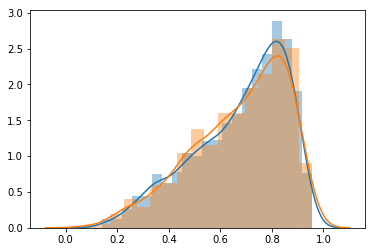

In [ ]:
df_con_predicciones = evaluar_clasificador(model,modo_prepro='todo',\
        dfs=(PISA_USA_train_X,PISA_USA_train_y,PISA_USA_test_X,PISA_USA_test_y),\
        target='readingScore',graficar=True)

In [ ]:
PISA_USA_test_pred = df_con_predicciones[df_con_predicciones.tipo=='test'].drop(columns='tipo')
PISA_USA_test_pred.columns

Index(['grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize',
       'raceeth_American Indian/Alaska Native', 'raceeth_Asian',
       'raceeth_Black', 'raceeth_Hispanic', 'raceeth_More than one race',
       'raceeth_Native Hawaiian/Other Pacific Islander', 'raceeth_White',
       'readingScore', 'prediccion', 'error', 'error_absoluto'],
      dtype='object')

#### ECF a mano (extendidas)

defino las combinaciones de valor (solo de las modificables)... para las continuas puedo definir rangos y pasos (pueden ser basados en metrica de dispersion.

1- fijo un individuo

2- veo la prob de ese individuo

3- defino las combinaciones

4- predigo con las combinaciones

5- me fijo el de max prob

In [ ]:
# elijo un individuo con poca probabilidad predicha

PISA_USA_test_pred[(PISA_USA_test_pred.prediccion>0.09) & (PISA_USA_test_pred.raceeth_Black==1)][['male', 'preschool', 'expectBachelors',
                   'motherWork','fatherWork','englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize',
       'raceeth_Black',
       'readingScore', 'prediccion','error']].sort_values('prediccion')

male  preschool  expectBachelors  motherWork  fatherWork  englishAtHome  \
430      1        1.0              0.0         1.0         1.0            1.0   
1348     1        0.0              1.0         0.0         1.0            1.0   
1159     1        1.0              1.0         0.0         0.0            1.0   
1488     1        1.0              0.0         1.0         1.0            1.0   
1146     0        0.0              0.0         0.0         0.0            1.0   
...    ...        ...              ...         ...         ...            ...   
1483     0        1.0              1.0         1.0         1.0            1.0   
1268     0        1.0              1.0         1.0         1.0            1.0   
1553     0        1.0              1.0         0.0         1.0            1.0   
75       0        1.0              1.0         1.0         1.0            1.0   
507      0        0.0              1.0         1.0         1.0            1.0   

      computerForSchoolwork  read30MinsADay  minutesPerWeekEnglish  \
430                     1.0             0.0                  300.0   
1348                    0.0             0.0                    0.0   
1159                    1.0             0.0                   55.0   
1488                    1.0             0.0                   45.0   
1146                    0.0             0.0                  270.0   
...                     ...             ...                    ...   
1483                    1.0             0.0                  275.0   
1268                    1.0             0.0                  300.0   
1553                    1.0             0.0                  270.0   
75                      1.0             1.0                  270.0   
507                     1.0             1.0                  450.0   

      studentsInEnglish  schoolHasLibrary  publicSchool  urban  schoolSize  \
430                25.0               1.0             1      0       898.0   
1348               24.0               1.0             1      0       820.0   
1159               30.0               1.0             1      0      1382.0   
1488               12.0               1.0             1      0      2041.0   
1146               23.0               1.0             1      0       865.0   
...                 ...               ...           ...    ...         ...   
1483               30.0               1.0             1      0      2041.0   
1268               28.0               1.0             1      1      3261.0   
1553               30.0               1.0             1      1      2999.0   
75                 17.0               1.0             1      0      1680.0   
507                20.0               1.0             1      0      1750.0   

      raceeth_Black  readingScore  prediccion     error  
430               1             0    0.226810 -0.226810  
1348              1             0    0.238152 -0.238152  
1159              1             0    0.238625 -0.238625  
1488              1             0    0.239738 -0.239738  
1146              1             0    0.254835 -0.254835  
...             ...           ...         ...       ...  
1483              1             1    0.768960  0.231040  
1268              1             0    0.770056 -0.770056  
1553              1             0    0.794194 -0.794194  
75                1             1    0.837166  0.162834  
507               1             0    0.851246 -0.851246  

[79 rows x 18 columns]

In [ ]:
# elijo indice=1146

individuo = PISA_USA_test_pred.drop(columns=[\
        'readingScore','prediccion','error','error_absoluto']).loc[1146,:]
individuo

grade                                              10.0
male                                                0.0
preschool                                           0.0
expectBachelors                                     0.0
motherHS                                            1.0
motherBachelors                                     0.0
motherWork                                          0.0
fatherHS                                            0.0
fatherBachelors                                     0.0
fatherWork                                          0.0
selfBornUS                                          1.0
motherBornUS                                        1.0
fatherBornUS                                        1.0
englishAtHome                                       1.0
computerForSchoolwork                               0.0
read30MinsADay                                      0.0
minutesPerWeekEnglish                             270.0
studentsInEnglish                               

In [ ]:
# primero definir las variables a cambiar
vars_perturb= ['grade','male','preschool','expectBachelors','motherWork',
              'fatherWork','englishAtHome','computerForSchoolwork',
               'read30MinsADay','minutesPerWeekEnglish','studentsInEnglish',
              'schoolHasLibrary','publicSchool','urban','schoolSize']

PISA_USA_test_pred[vars_perturb].describe()

grade        male   preschool  expectBachelors  motherWork  \
count  990.000000  990.000000  990.000000       990.000000  990.000000   
mean    10.128283    0.491919    0.722222         0.811111    0.719192   
std      0.513427    0.500187    0.448130         0.391618    0.449621   
min      9.000000    0.000000    0.000000         0.000000    0.000000   
25%     10.000000    0.000000    0.000000         1.000000    0.000000   
50%     10.000000    0.000000    1.000000         1.000000    1.000000   
75%     10.000000    1.000000    1.000000         1.000000    1.000000   
max     12.000000    1.000000    1.000000         1.000000    1.000000   

       fatherWork  englishAtHome  computerForSchoolwork  read30MinsADay  \
count  990.000000     990.000000             990.000000      990.000000   
mean     0.850505       0.864646               0.921212        0.295960   
std      0.356756       0.342274               0.269544        0.456704   
min      0.000000       0.000000               0.000000        0.000000   
25%      1.000000       1.000000               1.000000        0.000000   
50%      1.000000       1.000000               1.000000        0.000000   
75%      1.000000       1.000000               1.000000        1.000000   
max      1.000000       1.000000               1.000000        1.000000   

       minutesPerWeekEnglish  studentsInEnglish  schoolHasLibrary  \
count             990.000000         990.000000        990.000000   
mean              267.045455          24.665657          0.965657   
std               142.414549           6.782504          0.182202   
min                 0.000000           3.000000          0.000000   
25%               225.000000          20.000000          1.000000   
50%               250.000000          25.000000          1.000000   
75%               300.000000          30.000000          1.000000   
max              2025.000000          90.000000          1.000000   

       publicSchool       urban   schoolSize  
count    990.000000  990.000000   990.000000  
mean       0.913131    0.353535  1375.037374  
std        0.281785    0.478309   874.559124  
min        0.000000    0.000000   120.000000  
25%        1.000000    0.000000   636.000000  
50%        1.000000    0.000000  1274.500000  
75%        1.000000    1.000000  1969.250000  
max        1.000000    1.000000  6694.000000

In [ ]:
# hacer combinaciones

# primero definir las variables a cambiar
vars_perturb= ['grade','male','preschool','expectBachelors','motherWork',
              'fatherWork','englishAtHome','computerForSchoolwork',
               'read30MinsADay','minutesPerWeekEnglish','studentsInEnglish',
              'schoolHasLibrary','publicSchool','urban','schoolSize',
              'raceeth_White','raceeth_Black','raceeth_Asian']

grade=[9,10,11]
male=[0,1]
preschool=[0,1]
expectBachelors=[0,1]
motherWork=[0,1]
fatherWork=[0,1]
englishAtHome=[0,1]
computerForSchoolwork=[0,1]
read30MinsADay=[0,1]
minutesPerWeekEnglish=[210,240,300,300]
studentsInEnglish=[18,20,26,30]
schoolHasLibrary=[0,1]
publicSchool=[0,1]
urban=[0,1]
schoolSize=[200,500,800,1500]
raceeth_White=[0,1]
raceeth_Black=[0,1]
raceeth_Asian=[0,1]

from itertools import product
df_candidatos = pd.DataFrame(list(product(grade,male,preschool,expectBachelors,motherWork,
              fatherWork,englishAtHome,computerForSchoolwork,
               read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,
              schoolHasLibrary,publicSchool,urban,schoolSize,
                raceeth_White,raceeth_Black,raceeth_Asian)), 
             columns=vars_perturb)
df_candidatos

grade  male  preschool  expectBachelors  motherWork  fatherWork  \
0            9     0          0                0           0           0   
1            9     0          0                0           0           0   
2            9     0          0                0           0           0   
3            9     0          0                0           0           0   
4            9     0          0                0           0           0   
...        ...   ...        ...              ...         ...         ...   
3145723     11     1          1                1           1           1   
3145724     11     1          1                1           1           1   
3145725     11     1          1                1           1           1   
3145726     11     1          1                1           1           1   
3145727     11     1          1                1           1           1   

         englishAtHome  computerForSchoolwork  read30MinsADay  \
0                    0                      0               0   
1                    0                      0               0   
2                    0                      0               0   
3                    0                      0               0   
4                    0                      0               0   
...                ...                    ...             ...   
3145723              1                      1               1   
3145724              1                      1               1   
3145725              1                      1               1   
3145726              1                      1               1   
3145727              1                      1               1   

         minutesPerWeekEnglish  studentsInEnglish  schoolHasLibrary  \
0                          210                 18                 0   
1                          210                 18                 0   
2                          210                 18                 0   
3                          210                 18                 0   
4                          210                 18                 0   
...                        ...                ...               ...   
3145723                    300                 30                 1   
3145724                    300                 30                 1   
3145725                    300                 30                 1   
3145726                    300                 30                 1   
3145727                    300                 30                 1   

         publicSchool  urban  schoolSize  raceeth_White  raceeth_Black  \
0                   0      0         200              0              0   
1                   0      0         200              0              0   
2                   0      0         200              0              1   
3                   0      0         200              0              1   
4                   0      0         200              1              0   
...               ...    ...         ...            ...            ...   
3145723             1      1        1500              0              1   
3145724             1      1        1500              1              0   
3145725             1      1        1500              1              0   
3145726             1      1        1500              1              1   
3145727             1      1        1500              1              1   

         raceeth_Asian  
0                    0  
1                    1  
2                    0  
3                    1  
4                    0  
...                ...  
3145723              1  
3145724              0  
3145725              1  
3145726              0  
3145727              1  

[3145728 rows x 18 columns]

In [ ]:
cols_individuo = {}
for ind in individuo.drop(labels=vars_perturb).index:
    cols_individuo[ind] = [individuo[ind]]*len(df_candidatos)
cols_individuo = pd.DataFrame(cols_individuo)
cols_individuo

motherHS  motherBachelors  fatherHS  fatherBachelors  selfBornUS  \
0             1.0              0.0       0.0              0.0         1.0   
1             1.0              0.0       0.0              0.0         1.0   
2             1.0              0.0       0.0              0.0         1.0   
3             1.0              0.0       0.0              0.0         1.0   
4             1.0              0.0       0.0              0.0         1.0   
...           ...              ...       ...              ...         ...   
3145723       1.0              0.0       0.0              0.0         1.0   
3145724       1.0              0.0       0.0              0.0         1.0   
3145725       1.0              0.0       0.0              0.0         1.0   
3145726       1.0              0.0       0.0              0.0         1.0   
3145727       1.0              0.0       0.0              0.0         1.0   

         motherBornUS  fatherBornUS  raceeth_American Indian/Alaska Native  \
0                 1.0           1.0                                    0.0   
1                 1.0           1.0                                    0.0   
2                 1.0           1.0                                    0.0   
3                 1.0           1.0                                    0.0   
4                 1.0           1.0                                    0.0   
...               ...           ...                                    ...   
3145723           1.0           1.0                                    0.0   
3145724           1.0           1.0                                    0.0   
3145725           1.0           1.0                                    0.0   
3145726           1.0           1.0                                    0.0   
3145727           1.0           1.0                                    0.0   

         raceeth_Hispanic  raceeth_More than one race  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
...                   ...                         ...   
3145723               0.0                         0.0   
3145724               0.0                         0.0   
3145725               0.0                         0.0   
3145726               0.0                         0.0   
3145727               0.0                         0.0   

         raceeth_Native Hawaiian/Other Pacific Islander  
0                                                   0.0  
1                                                   0.0  
2                                                   0.0  
3                                                   0.0  
4                                                   0.0  
...                                                 ...  
3145723                                             0.0  
3145724                                             0.0  
3145725                                             0.0  
3145726                                             0.0  
3145727                                             0.0  

[3145728 rows x 11 columns]

In [ ]:
# añadir cols que faltan 

df_candidatos = pd.concat([df_candidatos,cols_individuo],axis='columns')\
    [PISA_USA_test_pred.drop(columns=['readingScore','prediccion','error',
                                     'error_absoluto']).columns]
df_candidatos

grade  male  preschool  expectBachelors  motherHS  motherBachelors  \
0            9     0          0                0       1.0              0.0   
1            9     0          0                0       1.0              0.0   
2            9     0          0                0       1.0              0.0   
3            9     0          0                0       1.0              0.0   
4            9     0          0                0       1.0              0.0   
...        ...   ...        ...              ...       ...              ...   
3145723     11     1          1                1       1.0              0.0   
3145724     11     1          1                1       1.0              0.0   
3145725     11     1          1                1       1.0              0.0   
3145726     11     1          1                1       1.0              0.0   
3145727     11     1          1                1       1.0              0.0   

         motherWork  fatherHS  fatherBachelors  fatherWork  ...  publicSchool  \
0                 0       0.0              0.0           0  ...             0   
1                 0       0.0              0.0           0  ...             0   
2                 0       0.0              0.0           0  ...             0   
3                 0       0.0              0.0           0  ...             0   
4                 0       0.0              0.0           0  ...             0   
...             ...       ...              ...         ...  ...           ...   
3145723           1       0.0              0.0           1  ...             1   
3145724           1       0.0              0.0           1  ...             1   
3145725           1       0.0              0.0           1  ...             1   
3145726           1       0.0              0.0           1  ...             1   
3145727           1       0.0              0.0           1  ...             1   

         urban  schoolSize  raceeth_American Indian/Alaska Native  \
0            0         200                                    0.0   
1            0         200                                    0.0   
2            0         200                                    0.0   
3            0         200                                    0.0   
4            0         200                                    0.0   
...        ...         ...                                    ...   
3145723      1        1500                                    0.0   
3145724      1        1500                                    0.0   
3145725      1        1500                                    0.0   
3145726      1        1500                                    0.0   
3145727      1        1500                                    0.0   

         raceeth_Asian  raceeth_Black  raceeth_Hispanic  \
0                    0              0               0.0   
1                    1              0               0.0   
2                    0              1               0.0   
3                    1              1               0.0   
4                    0              0               0.0   
...                ...            ...               ...   
3145723              1              1               0.0   
3145724              0              0               0.0   
3145725              1              0               0.0   
3145726              0              1               0.0   
3145727              1              1               0.0   

         raceeth_More than one race  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   
...                             ...   
3145723                         0.0   
3145724                         0.0   
3145725                         0.0   
3145726                         0.0   
3145727                         0.0   

         raceeth_Native Hawaiian/Other Pacific Islander  raceeth_White  
0      

In [ ]:
# ahora predecir

CF_pred = model.predict(df_candidatos)
df_candidatos['prediccion_CF'] = CF_pred

In [ ]:
df_candidatos.sort_values('prediccion_CF',ascending=False)\
            [vars_perturb+['prediccion_CF']]

grade  male  preschool  expectBachelors  motherWork  fatherWork  \
2355261     11     0          0                1           1           1   
2322493     11     0          0                1           1           0   
1306685     10     0          0                1           1           1   
1273917     10     0          0                1           1           0   
2355229     11     0          0                1           1           1   
...        ...   ...        ...              ...         ...         ...   
790466       9     1          1                0           0           0   
822218       9     1          1                0           0           1   
823242       9     1          1                0           0           1   
790474       9     1          1                0           0           0   
789450       9     1          1                0           0           0   

         englishAtHome  computerForSchoolwork  read30MinsADay  \
2355261              1                      1               1   
2322493              1                      1               1   
1306685              1                      1               1   
1273917              1                      1               1   
2355229              1                      1               1   
...                ...                    ...             ...   
790466               0                      0               0   
822218               0                      0               0   
823242               0                      0               0   
790474               0                      0               0   
789450               0                      0               0   

         minutesPerWeekEnglish  studentsInEnglish  schoolHasLibrary  \
2355261                    210                 18                 0   
2322493                    210                 18                 0   
1306685                    210                 18                 0   
1273917                    210                 18                 0   
2355229                    210                 18                 0   
...                        ...                ...               ...   
790466                     300                 30                 1   
822218                     300                 30                 1   
823242                     300                 30                 1   
790474                     300                 30                 1   
789450                     300                 30                 1   

         publicSchool  urban  schoolSize  raceeth_White  raceeth_Black  \
2355261             0      1        1500              1              0   
2322493             0      1        1500              1              0   
1306685             0      1        1500              1              0   
1273917             0      1        1500              1              0   
2355229             0      0        1500              1              0   
...               ...    ...         ...            ...            ...   
790466              1      0         200              0              1   
822218              1      0         500              0              1   
823242              1      0         500              0              1   
790474              1      0         500              0              1   
789450              1      0         500              0              1   

         raceeth_Asian  prediccion_CF  
2355261              1       0.908537  
2322493              1       0.908236  
1306685              1       0.908097  
1273917              1       0.907796  
2355229              1       0.907720  
...                ...            ...  
790466               0       0.107552  
822218               0       0.107282  
823242               0       0.107282  
790474               0       0.106841  
789450               0       0.106841  

[3145728 rows x 19 columns]

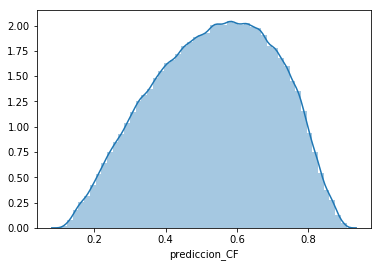

In [ ]:
sns.distplot(df_candidatos.prediccion_CF)

'Interesante schoolSize, parece que las escuelas con menos alumnos tienen \npeores resultados en general pero tienen tambien los mas altos.\nEn cambio las escuelas mas grandes tienden al promedio.'

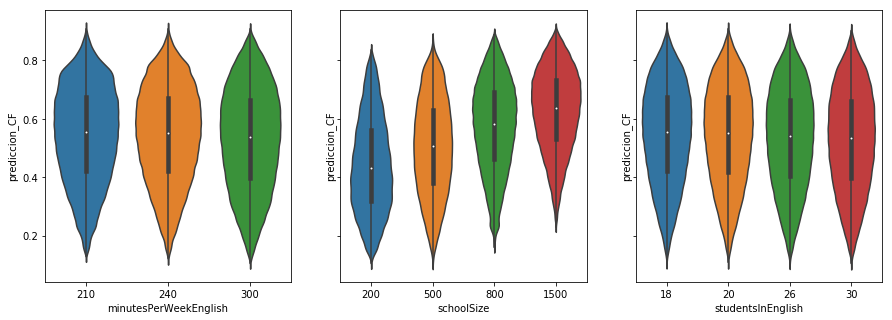

In [ ]:
fig,axes = plt.subplots(1,3,sharey=True,figsize=(15,5))

sns.violinplot(data=df_candidatos,x='minutesPerWeekEnglish',y='prediccion_CF',ax=axes[0])
sns.violinplot(data=df_candidatos,x='schoolSize',y='prediccion_CF',ax=axes[1])
sns.violinplot(data=df_candidatos,x='studentsInEnglish',y='prediccion_CF',ax=axes[2])

'''Interesante schoolSize, parece que las escuelas con menos alumnos tienen 
peores resultados en general pero tienen tambien los mas altos.
En cambio las escuelas mas grandes tienden al promedio.'''

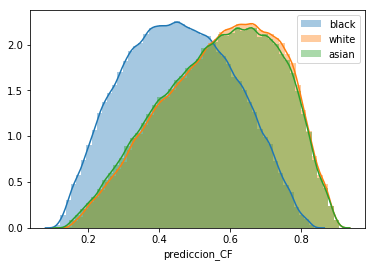

In [ ]:
sns.distplot(df_candidatos[df_candidatos.raceeth_Black==1].prediccion_CF,label='black')
sns.distplot(df_candidatos[df_candidatos.raceeth_White==1].prediccion_CF,label='white')
sns.distplot(df_candidatos[df_candidatos.raceeth_Asian==1].prediccion_CF,label='asian')
plt.legend()

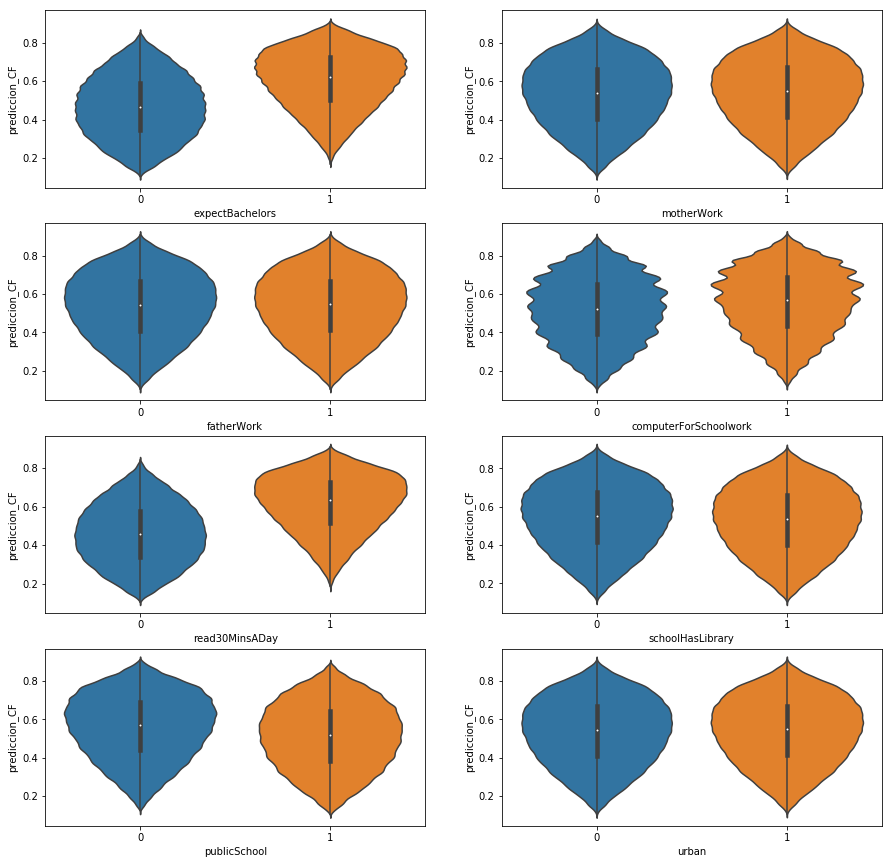

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(15,15))
sns.violinplot(data=df_candidatos,x='expectBachelors',y='prediccion_CF',ax=axes[0,0])
sns.violinplot(data=df_candidatos,x='motherWork',y='prediccion_CF',ax=axes[0,1])
sns.violinplot(data=df_candidatos,x='fatherWork',y='prediccion_CF',ax=axes[1,0])
sns.violinplot(data=df_candidatos,x='computerForSchoolwork',y='prediccion_CF',ax=axes[1,1])
sns.violinplot(data=df_candidatos,x='read30MinsADay',y='prediccion_CF',ax=axes[2,0])
sns.violinplot(data=df_candidatos,x='schoolHasLibrary',y='prediccion_CF',ax=axes[2,1])
sns.violinplot(data=df_candidatos,x='publicSchool',y='prediccion_CF',ax=axes[3,0])
sns.violinplot(data=df_candidatos,x='urban',y='prediccion_CF',ax=axes[3,1])

#### ECF a mano (rigurosa)

Ejemplo 1

In [ ]:
PISA_USA_test_pred[(PISA_USA_test_pred.prediccion>0.25) & 
                   (PISA_USA_test_pred.prediccion<0.40) &
                   (PISA_USA_test_pred.raceeth_White==1)][vars_perturb+['readingScore', 'prediccion','error']].sort_values('prediccion')

grade  male  preschool  expectBachelors  motherWork  fatherWork  \
1373      9     1        0.0              0.0         0.0         0.0   
1384     10     1        0.0              0.0         0.0         0.0   
1288      9     1        1.0              0.0         1.0         1.0   
199      10     1        0.0              0.0         1.0         1.0   
1025     10     1        0.0              0.0         0.0         1.0   
355      10     1        0.0              0.0         1.0         1.0   
1395     10     0        0.0              0.0         1.0         1.0   
1021      9     1        1.0              0.0         1.0         1.0   
499      11     1        0.0              1.0         1.0         0.0   
1026     10     1        0.0              0.0         0.0         1.0   
1476     10     1        1.0              0.0         0.0         1.0   
1460     10     1        1.0              0.0         1.0         1.0   
1292     10     0        1.0              0.0         1.0         1.0   
383      10     1        1.0              1.0         0.0         1.0   

      englishAtHome  computerForSchoolwork  read30MinsADay  \
1373            1.0                    0.0             0.0   
1384            1.0                    1.0             0.0   
1288            1.0                    1.0             0.0   
199             1.0                    0.0             0.0   
1025            1.0                    1.0             0.0   
355             1.0                    1.0             0.0   
1395            1.0                    1.0             0.0   
1021            1.0                    1.0             0.0   
499             1.0                    1.0             0.0   
1026            1.0                    1.0             0.0   
1476            1.0                    1.0             0.0   
1460            1.0                    1.0             0.0   
1292            1.0                    1.0             0.0   
383             1.0                    1.0             0.0   

      minutesPerWeekEnglish  ...  schoolHasLibrary  publicSchool  urban  \
1373                  300.0  ...               1.0             1      0   
1384                  275.0  ...               1.0             1      0   
1288                  280.0  ...               1.0             1      0   
199                   180.0  ...               1.0             1      0   
1025                  235.0  ...               1.0             1      0   
355                   225.0  ...               1.0             1      0   
1395                   30.0  ...               1.0             1      0   
1021                   15.0  ...               1.0             1      0   
499                     0.0  ...               1.0             1      0   
1026                  225.0  ...               1.0             1      0   
1476                  300.0  ...               1.0             1      0   
1460                   50.0  ...               1.0             1      0   
1292                   60.0  ...               1.0             1      0   
383                   675.0  ...               1.0             0      0   

      schoolSize  raceeth_White  raceeth_Black  raceeth_Asian  readingScore  \
1373       432.0              1              0              0             0   
1384       362.0              1              0              0             0   
1288       227.0              1              0              0             0   
199        196.0              1              0              0             0   
1025       347.0              1              0              0             0   
355        358.0              1              0              0             0   
1395      1347.0              1              0              0             0   
1021       347.0              1              0              0             0   
499       1750.0              1              0              0             1   
1026       347.0              1              0              0  

In [ ]:
# agarro index = 522 blanquito

individuo = PISA_USA_test_pred.drop(columns=[\
        'readingScore','prediccion','error','error_absoluto']).loc[522,:]
individuo

grade                                              10.0
male                                                0.0
preschool                                           0.0
expectBachelors                                     0.0
motherHS                                            1.0
motherBachelors                                     0.0
motherWork                                          0.0
fatherHS                                            0.0
fatherBachelors                                     0.0
fatherWork                                          1.0
selfBornUS                                          1.0
motherBornUS                                        1.0
fatherBornUS                                        1.0
englishAtHome                                       1.0
computerForSchoolwork                               0.0
read30MinsADay                                      1.0
minutesPerWeekEnglish                             480.0
studentsInEnglish                               

In [ ]:
# hacer combinaciones

# primero definir las variables a cambiar
vars_perturb= ['expectBachelors','motherWork','fatherWork','computerForSchoolwork',
               'read30MinsADay','minutesPerWeekEnglish','studentsInEnglish',
              'schoolHasLibrary','publicSchool','urban','schoolSize']

expectBachelors=[0,1]
motherWork=[0,1]
fatherWork=[0,1]
computerForSchoolwork=[0,1]
read30MinsADay=[0,1]
minutesPerWeekEnglish=[380,430,520,570]
studentsInEnglish=[16,18,23,27]
schoolHasLibrary=[0,1]
publicSchool=[0,1]
urban=[0,1]
schoolSize=[200,500,800,1500]

from itertools import product
df_candidatos = pd.DataFrame(list(product(expectBachelors,motherWork,fatherWork,computerForSchoolwork,
               read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,
              schoolHasLibrary,publicSchool,urban,schoolSize)), 
             columns=vars_perturb)
df_candidatos

expectBachelors  motherWork  fatherWork  computerForSchoolwork  \
0                    0           0           0                      0   
1                    0           0           0                      0   
2                    0           0           0                      0   
3                    0           0           0                      0   
4                    0           0           0                      0   
...                ...         ...         ...                    ...   
16379                1           1           1                      1   
16380                1           1           1                      1   
16381                1           1           1                      1   
16382                1           1           1                      1   
16383                1           1           1                      1   

       read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  \
0                   0                    380                 16   
1                   0                    380                 16   
2                   0                    380                 16   
3                   0                    380                 16   
4                   0                    380                 16   
...               ...                    ...                ...   
16379               1                    570                 27   
16380               1                    570                 27   
16381               1                    570                 27   
16382               1                    570                 27   
16383               1                    570                 27   

       schoolHasLibrary  publicSchool  urban  schoolSize  
0                     0             0      0         200  
1                     0             0      0         500  
2                     0             0      0         800  
3                     0             0      0        1500  
4                     0             0      1         200  
...                 ...           ...    ...         ...  
16379                 1             1      0        1500  
16380                 1             1      1         200  
16381                 1             1      1         500  
16382                 1             1      1         800  
16383                 1             1      1        1500  

[16384 rows x 11 columns]

In [ ]:
cols_individuo = {}
for ind in individuo.drop(labels=vars_perturb).index:
    cols_individuo[ind] = [individuo[ind]]*len(df_candidatos)
cols_individuo = pd.DataFrame(cols_individuo)
cols_individuo

grade  male  preschool  motherHS  motherBachelors  fatherHS  \
0       10.0   0.0        0.0       1.0              0.0       0.0   
1       10.0   0.0        0.0       1.0              0.0       0.0   
2       10.0   0.0        0.0       1.0              0.0       0.0   
3       10.0   0.0        0.0       1.0              0.0       0.0   
4       10.0   0.0        0.0       1.0              0.0       0.0   
...      ...   ...        ...       ...              ...       ...   
16379   10.0   0.0        0.0       1.0              0.0       0.0   
16380   10.0   0.0        0.0       1.0              0.0       0.0   
16381   10.0   0.0        0.0       1.0              0.0       0.0   
16382   10.0   0.0        0.0       1.0              0.0       0.0   
16383   10.0   0.0        0.0       1.0              0.0       0.0   

       fatherBachelors  selfBornUS  motherBornUS  fatherBornUS  englishAtHome  \
0                  0.0         1.0           1.0           1.0            1.0   
1                  0.0         1.0           1.0           1.0            1.0   
2                  0.0         1.0           1.0           1.0            1.0   
3                  0.0         1.0           1.0           1.0            1.0   
4                  0.0         1.0           1.0           1.0            1.0   
...                ...         ...           ...           ...            ...   
16379              0.0         1.0           1.0           1.0            1.0   
16380              0.0         1.0           1.0           1.0            1.0   
16381              0.0         1.0           1.0           1.0            1.0   
16382              0.0         1.0           1.0           1.0            1.0   
16383              0.0         1.0           1.0           1.0            1.0   

       raceeth_American Indian/Alaska Native  raceeth_Asian  raceeth_Black  \
0                                        0.0            0.0            0.0   
1                                        0.0            0.0            0.0   
2                                        0.0            0.0            0.0   
3                                        0.0            0.0            0.0   
4                                        0.0            0.0            0.0   
...                                      ...            ...            ...   
16379                                    0.0            0.0            0.0   
16380                                    0.0            0.0            0.0   
16381                                    0.0            0.0            0.0   
16382                                    0.0            0.0            0.0   
16383                                    0.0            0.0            0.0   

       raceeth_Hispanic  raceeth_More than one race  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   
...                 ...                         ...   
16379               0.0                         0.0   
16380               0.0                         0.0   
16381               0.0                         0.0   
16382               0.0                         0.0   
16383               0.0                         0.0   

       raceeth_Native Hawaiian/Other Pacific Islander  raceeth_White  
0                                                 0.0            1.0  
1                                                 0.0            1.0  
2                                                 0.0            1.0  
3                                                 0.0            1.0  
4                                                 0.0            1.0  
...                                               ...            ...  
16379                                             0.0            1.0  
16380                      

In [ ]:
# añadir cols que faltan 

df_candidatos = pd.concat([df_candidatos,cols_individuo],axis='columns')\
    [PISA_USA_test_pred.drop(columns=['readingScore','prediccion','error',
                                     'error_absoluto']).columns]
df_candidatos

grade  male  preschool  expectBachelors  motherHS  motherBachelors  \
0       10.0   0.0        0.0                0       1.0              0.0   
1       10.0   0.0        0.0                0       1.0              0.0   
2       10.0   0.0        0.0                0       1.0              0.0   
3       10.0   0.0        0.0                0       1.0              0.0   
4       10.0   0.0        0.0                0       1.0              0.0   
...      ...   ...        ...              ...       ...              ...   
16379   10.0   0.0        0.0                1       1.0              0.0   
16380   10.0   0.0        0.0                1       1.0              0.0   
16381   10.0   0.0        0.0                1       1.0              0.0   
16382   10.0   0.0        0.0                1       1.0              0.0   
16383   10.0   0.0        0.0                1       1.0              0.0   

       motherWork  fatherHS  fatherBachelors  fatherWork  ...  publicSchool  \
0               0       0.0              0.0           0  ...             0   
1               0       0.0              0.0           0  ...             0   
2               0       0.0              0.0           0  ...             0   
3               0       0.0              0.0           0  ...             0   
4               0       0.0              0.0           0  ...             0   
...           ...       ...              ...         ...  ...           ...   
16379           1       0.0              0.0           1  ...             1   
16380           1       0.0              0.0           1  ...             1   
16381           1       0.0              0.0           1  ...             1   
16382           1       0.0              0.0           1  ...             1   
16383           1       0.0              0.0           1  ...             1   

       urban  schoolSize  raceeth_American Indian/Alaska Native  \
0          0         200                                    0.0   
1          0         500                                    0.0   
2          0         800                                    0.0   
3          0        1500                                    0.0   
4          1         200                                    0.0   
...      ...         ...                                    ...   
16379      0        1500                                    0.0   
16380      1         200                                    0.0   
16381      1         500                                    0.0   
16382      1         800                                    0.0   
16383      1        1500                                    0.0   

       raceeth_Asian  raceeth_Black  raceeth_Hispanic  \
0                0.0            0.0               0.0   
1                0.0            0.0               0.0   
2                0.0            0.0               0.0   
3                0.0            0.0               0.0   
4                0.0            0.0               0.0   
...              ...            ...               ...   
16379            0.0            0.0               0.0   
16380            0.0            0.0               0.0   
16381            0.0            0.0               0.0   
16382            0.0            0.0               0.0   
16383            0.0            0.0               0.0   

       raceeth_More than one race  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   
...                           ...   
16379                         0.0   
16380                         0.0   
16381                         0.0   
16382                         0.0   
16383                         0.0   

       raceeth_Native Hawaiian/Other Pacific Islander  raceeth_White  
0                                                 0.0            1.0  
1                                                 0.0   

In [ ]:
# ahora predecir

CF_pred = model.predict(df_candidatos)
df_candidatos['prediccion_CF'] = CF_pred

df_candidatos.sort_values('prediccion_CF',ascending=False)\
            [vars_perturb+['prediccion_CF']]

expectBachelors  motherWork  fatherWork  computerForSchoolwork  \
14215                1           1           0                      1   
14247                1           1           0                      1   
16263                1           1           1                      1   
14279                1           1           0                      1   
16295                1           1           1                      1   
...                ...         ...         ...                    ...   
6520                 0           1           1                      0   
504                  0           0           0                      0   
376                  0           0           0                      0   
2552                 0           0           1                      0   
2424                 0           0           1                      0   

       read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  \
14215               1                    570                 16   
14247               1                    570                 18   
16263               1                    570                 16   
14279               1                    570                 23   
16295               1                    570                 18   
...               ...                    ...                ...   
6520                0                    520                 27   
504                 0                    570                 27   
376                 0                    520                 27   
2552                0                    570                 27   
2424                0                    520                 27   

       schoolHasLibrary  publicSchool  urban  schoolSize  prediccion_CF  
14215                 0             0      1        1500       0.919892  
14247                 0             0      1        1500       0.919848  
16263                 0             0      1        1500       0.919763  
14279                 0             0      1        1500       0.919738  
16295                 0             0      1        1500       0.919719  
...                 ...           ...    ...         ...            ...  
6520                  1             1      0         200       0.263106  
504                   1             1      0         200       0.262929  
376                   1             1      0         200       0.259886  
2552                  1             1      0         200       0.258859  
2424                  1             1      0         200       0.255846  

[16384 rows x 12 columns]

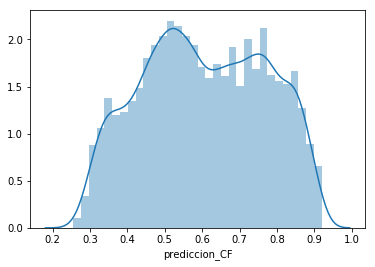

In [ ]:
sns.distplot(df_candidatos.prediccion_CF)

'Interesante schoolSize, parece que las escuelas con menos alumnos tienen \npeores resultados en general pero tienen tambien los mas altos.\nEn cambio las escuelas mas grandes tienden al promedio.'

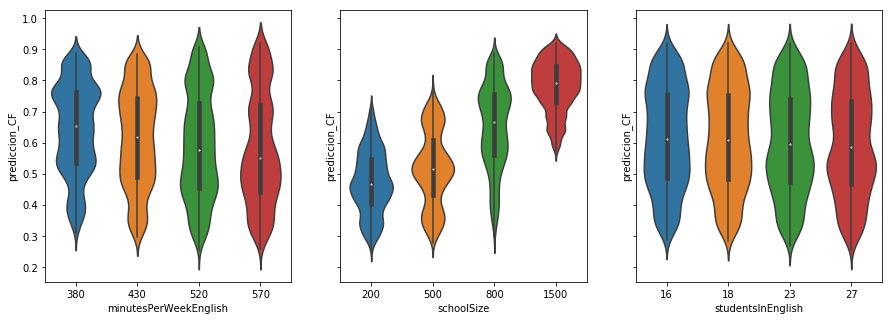

In [ ]:
fig,axes = plt.subplots(1,3,sharey=True,figsize=(15,5))

sns.violinplot(data=df_candidatos,x='minutesPerWeekEnglish',y='prediccion_CF',ax=axes[0])
sns.violinplot(data=df_candidatos,x='schoolSize',y='prediccion_CF',ax=axes[1])
sns.violinplot(data=df_candidatos,x='studentsInEnglish',y='prediccion_CF',ax=axes[2])

'''Interesante schoolSize, parece que las escuelas con menos alumnos tienen 
peores resultados en general pero tienen tambien los mas altos.
En cambio las escuelas mas grandes tienden al promedio.'''

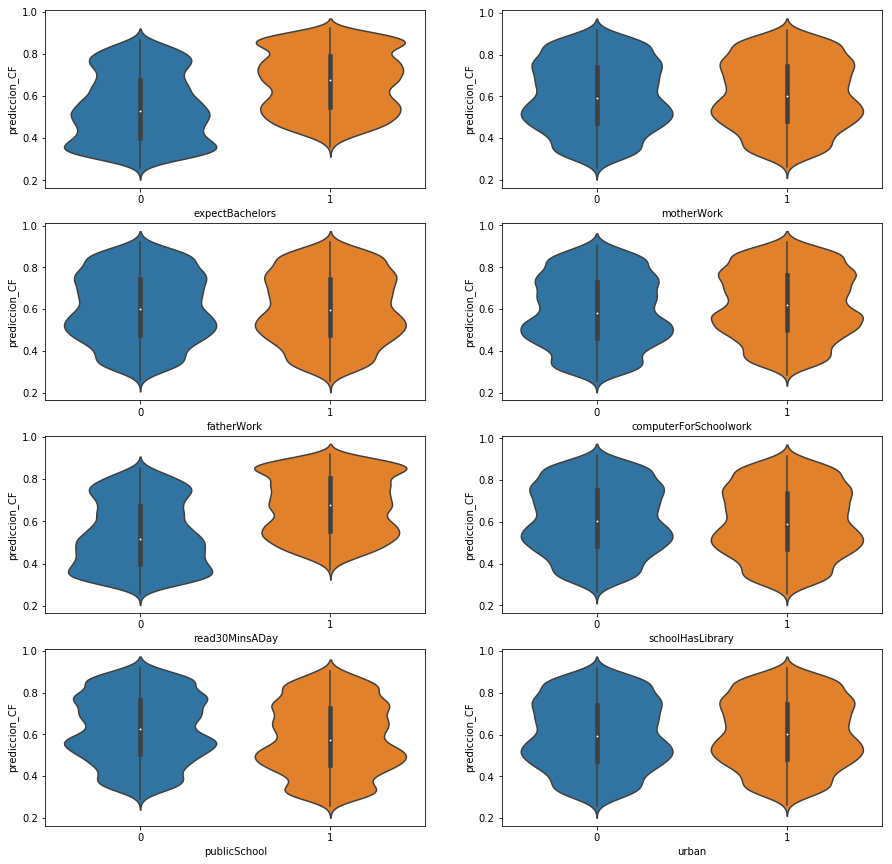

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(15,15))
sns.violinplot(data=df_candidatos,x='expectBachelors',y='prediccion_CF',ax=axes[0,0])
sns.violinplot(data=df_candidatos,x='motherWork',y='prediccion_CF',ax=axes[0,1])
sns.violinplot(data=df_candidatos,x='fatherWork',y='prediccion_CF',ax=axes[1,0])
sns.violinplot(data=df_candidatos,x='computerForSchoolwork',y='prediccion_CF',ax=axes[1,1])
sns.violinplot(data=df_candidatos,x='read30MinsADay',y='prediccion_CF',ax=axes[2,0])
sns.violinplot(data=df_candidatos,x='schoolHasLibrary',y='prediccion_CF',ax=axes[2,1])
sns.violinplot(data=df_candidatos,x='publicSchool',y='prediccion_CF',ax=axes[3,0])
sns.violinplot(data=df_candidatos,x='urban',y='prediccion_CF',ax=axes[3,1])

Ejemplo 2

In [ ]:
PISA_USA_test_pred[(PISA_USA_test_pred.prediccion>0.09) & 
                   (PISA_USA_test_pred.raceeth_Black==1)][vars_perturb+['readingScore', 'prediccion','error']].sort_values('prediccion')

expectBachelors  motherWork  fatherWork  computerForSchoolwork  \
430               0.0         1.0         1.0                    1.0   
1348              1.0         0.0         1.0                    0.0   
1159              1.0         0.0         0.0                    1.0   
1488              0.0         1.0         1.0                    1.0   
1146              0.0         0.0         0.0                    0.0   
...               ...         ...         ...                    ...   
1483              1.0         1.0         1.0                    1.0   
1268              1.0         1.0         1.0                    1.0   
1553              1.0         0.0         1.0                    1.0   
75                1.0         1.0         1.0                    1.0   
507               1.0         1.0         1.0                    1.0   

      read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  \
430              0.0                  300.0               25.0   
1348             0.0                    0.0               24.0   
1159             0.0                   55.0               30.0   
1488             0.0                   45.0               12.0   
1146             0.0                  270.0               23.0   
...              ...                    ...                ...   
1483             0.0                  275.0               30.0   
1268             0.0                  300.0               28.0   
1553             0.0                  270.0               30.0   
75               1.0                  270.0               17.0   
507              1.0                  450.0               20.0   

      schoolHasLibrary  publicSchool  urban  schoolSize  readingScore  \
430                1.0             1      0       898.0             0   
1348               1.0             1      0       820.0             0   
1159               1.0             1      0      1382.0             0   
1488               1.0             1      0      2041.0             0   
1146               1.0             1      0       865.0             0   
...                ...           ...    ...         ...           ...   
1483               1.0             1      0      2041.0             1   
1268               1.0             1      1      3261.0             0   
1553               1.0             1      1      2999.0             0   
75                 1.0             1      0      1680.0             1   
507                1.0             1      0      1750.0             0   

      prediccion     error  
430     0.226810 -0.226810  
1348    0.238152 -0.238152  
1159    0.238625 -0.238625  
1488    0.239738 -0.239738  
1146    0.254835 -0.254835  
...          ...       ...  
1483    0.768960  0.231040  
1268    0.770056 -0.770056  
1553    0.794194 -0.794194  
75      0.837166  0.162834  
507     0.851246 -0.851246  

[79 rows x 14 columns]

In [ ]:
# agarro index = 19 negrito

individuo = PISA_USA_test_pred.drop(columns=[\
        'readingScore','prediccion','error','error_absoluto']).loc[19,:]
individuo

grade                                              10.0
male                                                0.0
preschool                                           1.0
expectBachelors                                     0.0
motherHS                                            1.0
motherBachelors                                     0.0
motherWork                                          1.0
fatherHS                                            1.0
fatherBachelors                                     0.0
fatherWork                                          1.0
selfBornUS                                          1.0
motherBornUS                                        1.0
fatherBornUS                                        1.0
englishAtHome                                       1.0
computerForSchoolwork                               1.0
read30MinsADay                                      0.0
minutesPerWeekEnglish                             270.0
studentsInEnglish                               

In [ ]:
# hacer combinaciones

# primero definir las variables a cambiar
vars_perturb= ['expectBachelors','motherWork','fatherWork','computerForSchoolwork',
               'read30MinsADay','minutesPerWeekEnglish','studentsInEnglish',
              'schoolHasLibrary','publicSchool','urban','schoolSize']

expectBachelors=[0,1]
motherWork=[0,1]
fatherWork=[0,1]
computerForSchoolwork=[0,1]
read30MinsADay=[0,1]
minutesPerWeekEnglish=[380,430,520,570]
studentsInEnglish=[16,18,23,27]
schoolHasLibrary=[0,1]
publicSchool=[0,1]
urban=[0,1]
schoolSize=[200,500,800,1500]

from itertools import product
df_candidatos = pd.DataFrame(list(product(expectBachelors,motherWork,fatherWork,computerForSchoolwork,
               read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,
              schoolHasLibrary,publicSchool,urban,schoolSize)), 
             columns=vars_perturb)
df_candidatos

expectBachelors  motherWork  fatherWork  computerForSchoolwork  \
0                    0           0           0                      0   
1                    0           0           0                      0   
2                    0           0           0                      0   
3                    0           0           0                      0   
4                    0           0           0                      0   
...                ...         ...         ...                    ...   
16379                1           1           1                      1   
16380                1           1           1                      1   
16381                1           1           1                      1   
16382                1           1           1                      1   
16383                1           1           1                      1   

       read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  \
0                   0                    380                 16   
1                   0                    380                 16   
2                   0                    380                 16   
3                   0                    380                 16   
4                   0                    380                 16   
...               ...                    ...                ...   
16379               1                    570                 27   
16380               1                    570                 27   
16381               1                    570                 27   
16382               1                    570                 27   
16383               1                    570                 27   

       schoolHasLibrary  publicSchool  urban  schoolSize  
0                     0             0      0         200  
1                     0             0      0         500  
2                     0             0      0         800  
3                     0             0      0        1500  
4                     0             0      1         200  
...                 ...           ...    ...         ...  
16379                 1             1      0        1500  
16380                 1             1      1         200  
16381                 1             1      1         500  
16382                 1             1      1         800  
16383                 1             1      1        1500  

[16384 rows x 11 columns]

In [ ]:
cols_individuo = {}
for ind in individuo.drop(labels=vars_perturb).index:
    cols_individuo[ind] = [individuo[ind]]*len(df_candidatos)
cols_individuo = pd.DataFrame(cols_individuo)
cols_individuo

grade  male  preschool  motherHS  motherBachelors  fatherHS  \
0       10.0   0.0        1.0       1.0              0.0       1.0   
1       10.0   0.0        1.0       1.0              0.0       1.0   
2       10.0   0.0        1.0       1.0              0.0       1.0   
3       10.0   0.0        1.0       1.0              0.0       1.0   
4       10.0   0.0        1.0       1.0              0.0       1.0   
...      ...   ...        ...       ...              ...       ...   
16379   10.0   0.0        1.0       1.0              0.0       1.0   
16380   10.0   0.0        1.0       1.0              0.0       1.0   
16381   10.0   0.0        1.0       1.0              0.0       1.0   
16382   10.0   0.0        1.0       1.0              0.0       1.0   
16383   10.0   0.0        1.0       1.0              0.0       1.0   

       fatherBachelors  selfBornUS  motherBornUS  fatherBornUS  englishAtHome  \
0                  0.0         1.0           1.0           1.0            1.0   
1                  0.0         1.0           1.0           1.0            1.0   
2                  0.0         1.0           1.0           1.0            1.0   
3                  0.0         1.0           1.0           1.0            1.0   
4                  0.0         1.0           1.0           1.0            1.0   
...                ...         ...           ...           ...            ...   
16379              0.0         1.0           1.0           1.0            1.0   
16380              0.0         1.0           1.0           1.0            1.0   
16381              0.0         1.0           1.0           1.0            1.0   
16382              0.0         1.0           1.0           1.0            1.0   
16383              0.0         1.0           1.0           1.0            1.0   

       raceeth_American Indian/Alaska Native  raceeth_Asian  raceeth_Black  \
0                                        0.0            0.0            1.0   
1                                        0.0            0.0            1.0   
2                                        0.0            0.0            1.0   
3                                        0.0            0.0            1.0   
4                                        0.0            0.0            1.0   
...                                      ...            ...            ...   
16379                                    0.0            0.0            1.0   
16380                                    0.0            0.0            1.0   
16381                                    0.0            0.0            1.0   
16382                                    0.0            0.0            1.0   
16383                                    0.0            0.0            1.0   

       raceeth_Hispanic  raceeth_More than one race  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   
...                 ...                         ...   
16379               0.0                         0.0   
16380               0.0                         0.0   
16381               0.0                         0.0   
16382               0.0                         0.0   
16383               0.0                         0.0   

       raceeth_Native Hawaiian/Other Pacific Islander  raceeth_White  
0                                                 0.0            0.0  
1                                                 0.0            0.0  
2                                                 0.0            0.0  
3                                                 0.0            0.0  
4                                                 0.0            0.0  
...                                               ...            ...  
16379                                             0.0            0.0  
16380                      

In [ ]:
# añadir cols que faltan 

df_candidatos = pd.concat([df_candidatos,cols_individuo],axis='columns')\
    [PISA_USA_test_pred.drop(columns=['readingScore','prediccion','error',
                                     'error_absoluto']).columns]
df_candidatos

grade  male  preschool  expectBachelors  motherHS  motherBachelors  \
0       10.0   0.0        1.0                0       1.0              0.0   
1       10.0   0.0        1.0                0       1.0              0.0   
2       10.0   0.0        1.0                0       1.0              0.0   
3       10.0   0.0        1.0                0       1.0              0.0   
4       10.0   0.0        1.0                0       1.0              0.0   
...      ...   ...        ...              ...       ...              ...   
16379   10.0   0.0        1.0                1       1.0              0.0   
16380   10.0   0.0        1.0                1       1.0              0.0   
16381   10.0   0.0        1.0                1       1.0              0.0   
16382   10.0   0.0        1.0                1       1.0              0.0   
16383   10.0   0.0        1.0                1       1.0              0.0   

       motherWork  fatherHS  fatherBachelors  fatherWork  ...  publicSchool  \
0               0       1.0              0.0           0  ...             0   
1               0       1.0              0.0           0  ...             0   
2               0       1.0              0.0           0  ...             0   
3               0       1.0              0.0           0  ...             0   
4               0       1.0              0.0           0  ...             0   
...           ...       ...              ...         ...  ...           ...   
16379           1       1.0              0.0           1  ...             1   
16380           1       1.0              0.0           1  ...             1   
16381           1       1.0              0.0           1  ...             1   
16382           1       1.0              0.0           1  ...             1   
16383           1       1.0              0.0           1  ...             1   

       urban  schoolSize  raceeth_American Indian/Alaska Native  \
0          0         200                                    0.0   
1          0         500                                    0.0   
2          0         800                                    0.0   
3          0        1500                                    0.0   
4          1         200                                    0.0   
...      ...         ...                                    ...   
16379      0        1500                                    0.0   
16380      1         200                                    0.0   
16381      1         500                                    0.0   
16382      1         800                                    0.0   
16383      1        1500                                    0.0   

       raceeth_Asian  raceeth_Black  raceeth_Hispanic  \
0                0.0            1.0               0.0   
1                0.0            1.0               0.0   
2                0.0            1.0               0.0   
3                0.0            1.0               0.0   
4                0.0            1.0               0.0   
...              ...            ...               ...   
16379            0.0            1.0               0.0   
16380            0.0            1.0               0.0   
16381            0.0            1.0               0.0   
16382            0.0            1.0               0.0   
16383            0.0            1.0               0.0   

       raceeth_More than one race  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   
...                           ...   
16379                         0.0   
16380                         0.0   
16381                         0.0   
16382                         0.0   
16383                         0.0   

       raceeth_Native Hawaiian/Other Pacific Islander  raceeth_White  
0                                                 0.0            0.0  
1                                                 0.0   

In [ ]:
# ahora predecir

CF_pred = model.predict(df_candidatos)
df_candidatos['prediccion_CF'] = CF_pred

df_candidatos.sort_values('prediccion_CF',ascending=False)\
            [vars_perturb+['prediccion_CF']]

expectBachelors  motherWork  fatherWork  computerForSchoolwork  \
14215                1           1           0                      1   
16263                1           1           1                      1   
14247                1           1           0                      1   
16295                1           1           1                      1   
14211                1           1           0                      1   
...                ...         ...         ...                    ...   
2521                 0           0           1                      0   
2554                 0           0           1                      0   
506                  0           0           0                      0   
505                  0           0           0                      0   
2553                 0           0           1                      0   

       read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  \
14215               1                    570                 16   
16263               1                    570                 16   
14247               1                    570                 18   
16295               1                    570                 18   
14211               1                    570                 16   
...               ...                    ...                ...   
2521                0                    570                 23   
2554                0                    570                 27   
506                 0                    570                 27   
505                 0                    570                 27   
2553                0                    570                 27   

       schoolHasLibrary  publicSchool  urban  schoolSize  prediccion_CF  
14215                 0             0      1        1500       0.814496  
16263                 0             0      1        1500       0.814244  
14247                 0             0      1        1500       0.814131  
16295                 0             0      1        1500       0.813879  
14211                 0             0      0        1500       0.813307  
...                 ...           ...    ...         ...            ...  
2521                  1             1      0         500       0.123839  
2554                  1             1      0         800       0.123774  
506                   1             1      0         800       0.123274  
505                   1             1      0         500       0.121943  
2553                  1             1      0         500       0.121838  

[16384 rows x 12 columns]

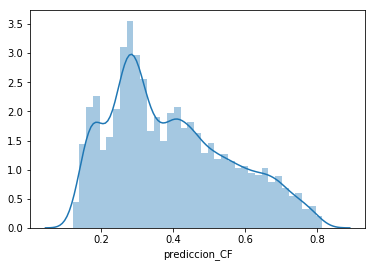

In [ ]:
sns.distplot(df_candidatos.prediccion_CF)

'Interesante schoolSize, parece que las escuelas con menos alumnos tienen \npeores resultados en general pero tienen tambien los mas altos.\nEn cambio las escuelas mas grandes tienden al promedio.'

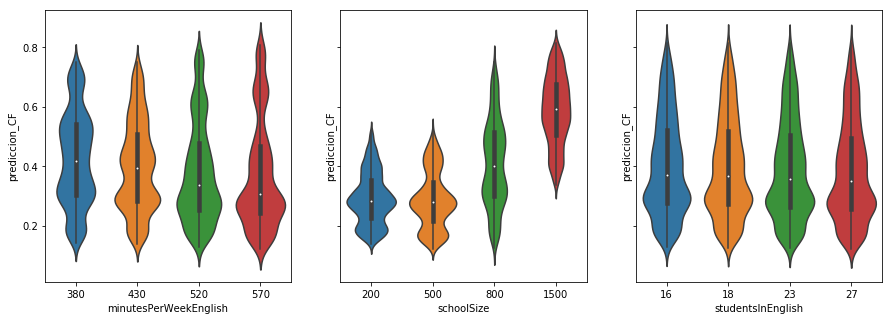

In [ ]:
fig,axes = plt.subplots(1,3,sharey=True,figsize=(15,5))

sns.violinplot(data=df_candidatos,x='minutesPerWeekEnglish',y='prediccion_CF',ax=axes[0])
sns.violinplot(data=df_candidatos,x='schoolSize',y='prediccion_CF',ax=axes[1])
sns.violinplot(data=df_candidatos,x='studentsInEnglish',y='prediccion_CF',ax=axes[2])

'''Interesante schoolSize, parece que las escuelas con menos alumnos tienen 
peores resultados en general pero tienen tambien los mas altos.
En cambio las escuelas mas grandes tienden al promedio.'''

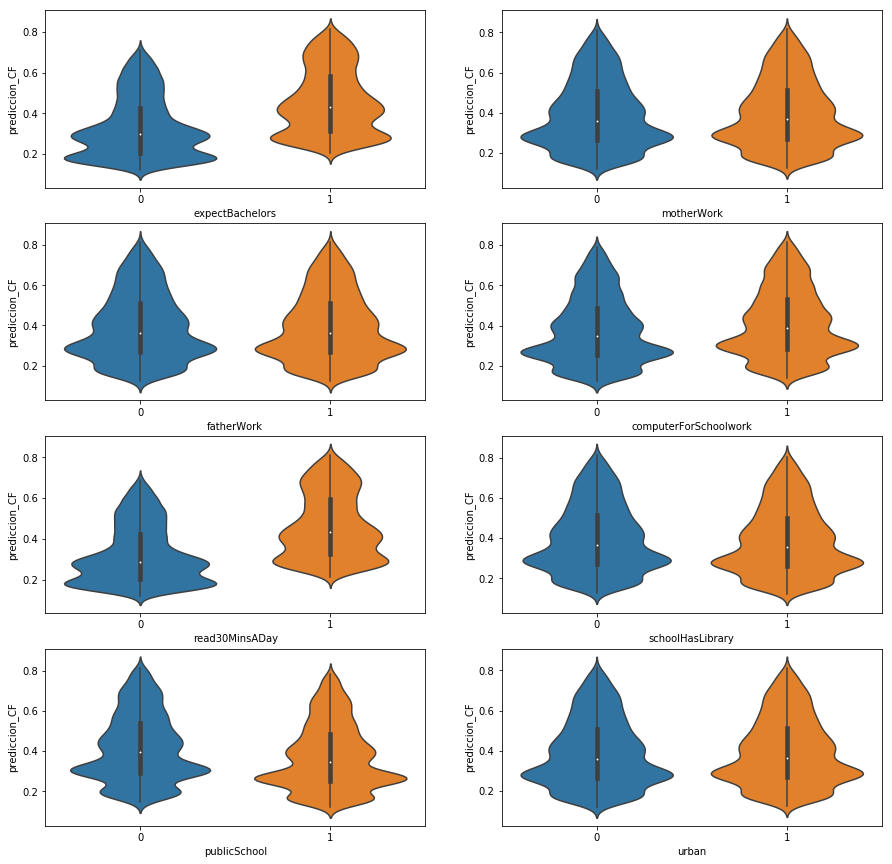

In [ ]:

fig, axes = plt.subplots(4,2,figsize=(15,15))
sns.violinplot(data=df_candidatos,x='expectBachelors',y='prediccion_CF',ax=axes[0,0])
sns.violinplot(data=df_candidatos,x='motherWork',y='prediccion_CF',ax=axes[0,1])
sns.violinplot(data=df_candidatos,x='fatherWork',y='prediccion_CF',ax=axes[1,0])
sns.violinplot(data=df_candidatos,x='computerForSchoolwork',y='prediccion_CF',ax=axes[1,1])
sns.violinplot(data=df_candidatos,x='read30MinsADay',y='prediccion_CF',ax=axes[2,0])
sns.violinplot(data=df_candidatos,x='schoolHasLibrary',y='prediccion_CF',ax=axes[2,1])
sns.violinplot(data=df_candidatos,x='publicSchool',y='prediccion_CF',ax=axes[3,0])
sns.violinplot(data=df_candidatos,x='urban',y='prediccion_CF',ax=axes[3,1])

## Problema: proximidad vs diversidad

El problema de realizar la exploracion de contrafacticos de esta manera es que es dificil coordinar el trade-off entre la proximidad y la diversidad. Aparte, hay muchas cosas para tener en cuenta: muchas de las variables no son factibles de ser modificadas y otras combinaciones se encuentran limitadas (no es posible agregar un titulo universitario y mantener constante la edad).

Para considerar todos estos factores, se presenta a continuacion un conjunto de tecnicas que plantea esta situacion como un problema de optimizacion:

# 4- Generacion de contrafacticos

PONER OTROS METODOS ANTERIORES DE GENERACION DE CONTRAFACTICOS


## DiCE (explicaciones contrafacticas diversas)

El metodo DiCE (Diverse Counterfactual Explanations) trata de resolver el problema de la factibilidad y facilidad de cambiar ciertas variables de una instancia, y le da un marco de problema de optimizacion a la busqueda de los contrafacticos.

Al igual que todos los sistemas de apoyo para la toma de decisiones basados en ejemplos, necesitamos un conjunto de ejemplos contrafacticos para ayudar a una persona a interpretar los modelos de machine learning complejos. Esos ejemplos deben estar balanceados entre:

- un rango amplio de cambios sugeridos (diversidad) y 
- la facilidad relativa de adoptar esos cambios (proximidad al input original)
- seguir las leyes causales de las sociedades humanas 

Se propone un metodo que genera conjuntos de ejemplos contrafacticos diversos para cualquier clasificador de ML diferenciable. Se construye un problema de optimizacion que considera la diversidad de ejemplos contrafacticos generados, de acuerdo con proximidad al input original.

Resolver el problema de optimizacion requiere considerar un tradeoff entre variables categoricas y continuas que pueden diferir en sus escalas relativas y facilidad de cambio. Damos una solucion general para este problema de optimizacion que puede generar cualquier numero de ejemplos contrafacticos para un input dado.

Para facilitar la accionabilidad, nuestra solucion es flexible suficientemente para para soportar input suministrado por usuarios basado en conocimiento del dominio. Luego damos una metrica de evaluacion cuantitativa para cualquier conjunto de ejemplos CF. Dada la inherente subjetividad, ejemplos CF son dificiles de evaluar. Proponemos metricas que pueden ayudar a ajustar los parametros de una solucion propuesta para conseguir lo buscado.

En cuanto a la CAUSALIDAD: por si mismos, los ejemplos contrafacticos no tienen ningun conocimiento causal acerca de las variables que modifican. Las variables no existen aisladas, provienen de un proceso de generacion de datos que tiene restricciones. Perturbar independientemente cada variable puede llevar a ejemplos imposibles en la vida real. Para asegurarnos que sean posibles, se propone un metodo basado en restricciones causales que filtre los ejemplos CF.

### Motor de generacion de contrafacticos

El input de nuestro problema es un modelo ML entrenado f y una instancia x. Queremos generar un conjunto de k contrafacticos {$c_1,c_2,...,c_k$} tal que todos esos producen un resultado diferente que x. Todos estos ejemplos son d-dimensionales.

Aca se ASUME QUE LOS MODELOS SON DIFERENCIABLES Y ESTATICOS y el OUTPUT ES BINARIO.


Objetivo: generar conjunto contrafactico FACTIBLE y accionable. Cosas a las que se puedan llegar en la realidad. Se necesitan que sean lo suficientemente diversos pero al mismo tiempo posible. Se usa la restriccion de factibilidad de Wachter y otras restricciones del usuario.

### Restricciones de diversidad y factibilidad

#### Diversidad mediante procesos puntuales determinantes

https://www.youtube.com/watch?v=o6xbYsOMtFU

Se captura la diversidad mediante procesos puntuales determinantes (DPP determinantal point processes). Se usa la siguiente metrica basado en el determinante de la matriz kernel dado el contrafactico:

$$dpp__diversity = det(K)$$
donde $K_{i,j}=\frac{1}{1+dist(c_i,c_j)}$ es la metrica de distancia entre dos ejemplos contrafacticos. Se añaden perturbaciones random a los elementos diagonales para computar el determinante.

**Proximidad**: ECF que estan mas cerca del input original son los mas valiosos para un usuario. Cuantificamos la proximidad como el vector de distancia (negativo) entre el input original y cada ECF (mediante los features). Se puede usar una metrica de distancia especifica como l1 y esta se puede pesar por el usuario (puede ser hiperparametro para cada feature). Proximidad de un conjunto de ECF es al proximidad media sobre el conjunto:

$$Proximity= -\frac{1}{k}\sum_{i=1}^{k}dist(c_i,x)$$

**Dispersion** (sparsity): propiedad de que sea posible. Intuitivamente, un ECF va a ser mas posible si cambia la menor cantidad de variables. Como es una restriccion no convexa (porque siempre queres menos), lo modificamos aparte (esta en seccion 3.3).

**Restricciones de usuarios**: un ECF puede estar cerca en el espacio de features pero puede no ser posible por restricciones en la vida real. Tiene sentido permitir al usuario que delimite restricciones a la manipulacion de features. Pueden especificarse de dos maneras:
- como ejemplos en cajas (usando rangos de valores para cada feature). Ejemplo: ingresos no pueden superar 200mil.
- alternativamente, el usuario puede especificar las variables que pueden ser modificadas.


### Optimizacion

Basado en los conceptos anteriores de diversidad y proximidad, se construye una funcion de costo sobre todos los contrafacticos generados:

### $$C(x) = argmin_{(c_1,...c_k)} \frac{1}{k}\sum_{i=1}^k yloss(f(c_i),y) + \frac{\lambda_1}{k}\sum_{i=1}^kdist(c_i,x) - \lambda_2dppDiversity(c_1,...c_k)$$

- $c_i$ es un ECF
- $k$ es la cantidad de ECF generados
- $f(.)$ es el modelo ML entrenado
- $yloss(.)$ es la metrica que minimiza el resultado de un ECF con el output buscado $y$ (usualmente 1)
- $d$ numero total de features
- $x$ es el input original
- $dppDiversity(.)$ es la metrica de diversidad
- $\lambda_1$ y $\lambda_2$ son hiperparametros que balancean las tres partes de la funcion!!!


**Implementacion**: optimizamos la funcion anterior usando **gradient descent**. Idealmente podemos obtener $f(c_i)=y$ para cada ECF, pero a veces no es posible porque el objetivo es no-convexo. Hacemos un maximo de 5000 steps o hasta que la funcion de perdida converge y el contrafactico es generado (cuando llega a la clase buscada). Se inicializan todos los ECF de forma aleatoria.

> se puede ampliar a que, en vez que llegue a output binario buscado te devuelva la probabilidad y eso incluirlo en la funcion de perdida


### Consideraciones practicas
Son importantes para apoyar la interaccion con los usuarios de los CF.

**Eleccion de yloss**: como un contrafactico solo necesita pasar el threshold, puede no ser necesario medir la perdida a y, sino al valor que hace pasar al threshold. O lo podemos truncar y decir que si pasa el threshold hay 0 pena (hinge loss).

**Eleccion de funcion de distancia**: para features continuos, se define la distanciacomo la distancia minima l1 de los features entre el ECF y el input. Como los features pueden tener distintos rangos, dividimos por la median absolute deviation (MAD) de cada feature. Con esto captamos la importancia relativa de los cambios. (FORMULAS EN EL PAPER).
Para variables categoricas, es dificil medir la distancia. Aca se usa 1 si cambio en el valor y 0 si no.
> (se puede inferir la facilidad/posibilidad de pasar de un estado a otro segun los datos de entrenamiento?)

**Escala relativa de variables**: como **la escala de una variable influye mucho que tanto importa en la funcion objetivo**, creemos que lo ideal es permitir a los usuarios que pongan sus preferencias para las variables. Igualmente transformamos todas las features en [0,1]. Las continuas son escaladas entre 0 y 1. Para variables categoricas, convertimos cada variable con one-hot encoding y la consideramos como una variable continua.

**Mejorar la dispersion**: mientras la funcion objetivo minimiza la distancia entre el input y el ECF, el ECF ideal necesita ser diverso en la cantidad de features que cambia. Usamos una operacion post-hoc cuando encuentra un ECF que va llevando de a poco los valores de nuevo al original x hasta que cambia de resultado de nuevo al no buscado.

**Eleccion de hiperparametros**: aca usamos $\lambda_1=0.5$ y $\lambda_2=1$.

# 5- Ejemplos con DiCE

Se utiliza el mismo dataset de resultados PISA de Estados Unidos de 2009 pero esta vez usando la libreria **DiCE** de python para la generacion de los contrafacticos.

### PISA USA 2009


In [ ]:
# import DiCE
import dice_ml
from dice_ml.utils import helpers # helper functions

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras

# supress deprecation warnings from TF
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
PISA_USA_train_X2,PISA_USA_train_y2,PISA_USA_test_X2,PISA_USA_test_y2 = \
    prepro_PISA_USA_2009(\
        PISA_USA_2009_train,PISA_USA_2009_test, 'readingScore',\
        binarizar=True, corte=500,drop_na=True)

In [ ]:
PISA_USA_train_dice = pd.concat([PISA_USA_train_X2,PISA_USA_train_y2],axis='columns')
PISA_USA_test_dice = pd.concat([PISA_USA_test_X2,PISA_USA_test_y2],axis='columns')

PISA_USA_dice = pd.concat([PISA_USA_train_dice,PISA_USA_test_dice])

PISA_USA_dice

grade  male             raceeth  preschool  expectBachelors  motherHS  \
1        11     1               White        0.0              0.0       1.0   
3        10     0               Black        1.0              1.0       0.0   
4        10     1            Hispanic        1.0              0.0       1.0   
7        10     0               White        1.0              1.0       1.0   
9        10     1  More than one race        1.0              1.0       1.0   
...     ...   ...                 ...        ...              ...       ...   
1562     10     0               White        1.0              1.0       1.0   
1563     10     0            Hispanic        1.0              1.0       1.0   
1565      9     1               White        1.0              1.0       1.0   
1568     10     0               White        1.0              1.0       1.0   
1569     10     0               White        1.0              1.0       1.0   

      motherBachelors  motherWork  fatherHS  fatherBachelors  fatherWork  \
1                 1.0         1.0       1.0              0.0         1.0   
3                 0.0         1.0       1.0              0.0         1.0   
4                 0.0         1.0       1.0              0.0         0.0   
7                 0.0         0.0       1.0              0.0         1.0   
9                 1.0         1.0       0.0              0.0         1.0   
...               ...         ...       ...              ...         ...   
1562              1.0         1.0       1.0              1.0         1.0   
1563              0.0         1.0       1.0              1.0         1.0   
1565              0.0         1.0       0.0              0.0         1.0   
1568              1.0         1.0       1.0              1.0         1.0   
1569              0.0         1.0       1.0              1.0         1.0   

      selfBornUS  motherBornUS  fatherBornUS  englishAtHome  \
1            1.0           1.0           1.0            1.0   
3            1.0           1.0           1.0            1.0   
4            1.0           1.0           0.0            1.0   
7            1.0           1.0           1.0            1.0   
9            1.0           1.0           1.0            1.0   
...          ...           ...           ...            ...   
1562         1.0           1.0           1.0            1.0   
1563         0.0           0.0           0.0            0.0   
1565         1.0           1.0           1.0            1.0   
1568         1.0           1.0           1.0            1.0   
1569         1.0           1.0           1.0            1.0   

      computerForSchoolwork  read30MinsADay  minutesPerWeekEnglish  \
1                       1.0             1.0                  450.0   
3                       1.0             1.0                  200.0   
4                       1.0             1.0                  250.0   
7                       1.0             1.0                  300.0   
9                       1.0             0.0                  294.0   
...                     ...             ...                    ...   
1562                    1.0             0.0                  270.0   
1563                    1.0             1.0                  270.0   
1565                    1.0             0.0                  300.0   
1568                    1.0             1.0                  450.0   
1569                    1.0             0.0                  450.0   

      studentsInEnglish  schoolHasLibrary  publicSchool  urban  schoolSize  \
1                  25.0               1.0             1      0      1173.0   
3                  23.0               1.0             1      1      2640.0   
4                  35.0               1.0             1      1      1095.0   
7                  30.0               1.0             1      0      1913.0   
9                  24.0               1.0             1      0       899.0   
...                 ...               ...           ...    ...         ...   


In [ ]:
d = dice_ml.Data(dataframe=PISA_USA_dice, \
    continuous_features=['minutesPerWeekEnglish', 'studentsInEnglish','schoolSize'], \
    outcome_name='readingScore')

In [ ]:
# aca entreno el modelo. Ya fue

# sess = tf.InteractiveSession()

train, _ = d.split_data(d.normalize_data(d.one_hot_encoded_data))
X_train = train.loc[:, train.columns != 'readingScore']
y_train = train.loc[:, train.columns == 'readingScore']

ann_model = keras.Sequential()
ann_model.add(keras.layers.Dense(30, input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
ann_model.add(keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
ann_model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

ann_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
ann_model.fit(X_train, y_train, validation_split=0.20, epochs=100, verbose=0)



 TRAIN 


2723/2723 [==============================] - 0s 46us/sample - loss: 0.5787 - accuracy: 0.7183
Accuracy con TRAIN : 71.83
Area under the ROC curve : 0.778525
El punto de corte optimo es  0.5680000185966492

Confusion matrix: 
 [[ 822  320]
 [ 451 1130]]
Accuracy:  0.7168564083731179
f1:  0.7456285054437478
recall:  0.7147375079063883
precision:  0.7793103448275862
paso evaluacion train 




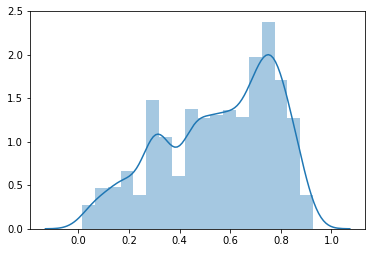

In [ ]:
# evaluar clasificador (solo con train por restriccion de libreria)

df_con_predicciones2 = evaluar_clasificador(ann_model,modo_prepro='train',\
        dfs=(X_train,y_train),\
        target='readingScore',graficar=True)

In [ ]:
backend = 'TF'+tf.__version__[0] 
m = dice_ml.Model(model=ann_model, backend=backend)

# initiate DiCE
exp = dice_ml.Dice(d, m)

In [ ]:
# query instance in the form of a dictionary; keys: feature name, values: feature value
query_instance = {'grade':11, 'male':0, 'raceeth':'Black', 'preschool':0.0, 'expectBachelors':0.0, 'selfBornUS':0.0,
       'englishAtHome':0.0, 'computerForSchoolwork':0.0, 'read30MinsADay':0.0,
       'minutesPerWeekEnglish':45.0, 'studentsInEnglish':20, 'schoolHasLibrary':0.0,
       'publicSchool':1, 'urban':1, 'schoolSize':500}

In [ ]:
# generate counterfactuals
dice_exp = exp.generate_counterfactuals(query_instance, max_iter=1000,
                        total_CFs=4, desired_class="opposite",verbose=1,
    features_to_vary=['englishAtHome','computerForSchoolwork','read30MinsADay',
                     'minutesPerWeekEnglish','studentsInEnglish','schoolHasLibrary',
                     'publicSchool','schoolHasLibrary'])

step 1,  loss=5.96483
step 51,  loss=4.10655
step 101,  loss=3.33189
step 151,  loss=3.3168
step 201,  loss=3.311
step 251,  loss=3.31089
step 301,  loss=3.31073
step 351,  loss=3.30993
step 401,  loss=3.31173
step 451,  loss=3.31032
step 501,  loss=3.3115
Diverse Counterfactuals found! total time taken: 00 min 57 sec


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# visualize the resutls
dice_exp.visualize_as_dataframe()

Query instance (original outcome : 0)


grade male raceeth preschool expectBachelors motherHS motherBachelors  \
0    11    0   Black       0.0             0.0      0.0             0.0   

  motherWork fatherHS fatherBachelors fatherWork selfBornUS motherBornUS  \
0        0.0      0.0             0.0        0.0        0.0          0.0   

  fatherBornUS englishAtHome computerForSchoolwork read30MinsADay  \
0          0.0           0.0                   0.0            0.0   

   minutesPerWeekEnglish  studentsInEnglish schoolHasLibrary publicSchool  \
0                   45.0               20.0              0.0            1   

  urban  schoolSize  readingScore  
0     1       500.0      0.198768


Diverse Counterfactual set (new outcome : 1)


grade male raceeth preschool expectBachelors motherHS motherBachelors  \
0    11    0   Black       0.0             0.0      0.0             0.0   
1    11    0   Black       0.0             0.0      0.0             0.0   
2    11    0   Black       0.0             0.0      0.0             0.0   
3    11    0   Black       0.0             0.0      0.0             0.0   

  motherWork fatherHS fatherBachelors fatherWork selfBornUS motherBornUS  \
0        0.0      0.0             0.0        0.0        0.0          0.0   
1        0.0      0.0             0.0        0.0        0.0          0.0   
2        0.0      0.0             0.0        0.0        0.0          0.0   
3        0.0      0.0             0.0        0.0        0.0          0.0   

  fatherBornUS englishAtHome computerForSchoolwork read30MinsADay  \
0          0.0           0.0                   1.0            1.0   
1          0.0           0.0                   1.0            0.0   
2          0.0           0.0                   1.0            0.0   
3          0.0           0.0                   1.0            0.0   

   minutesPerWeekEnglish  studentsInEnglish schoolHasLibrary publicSchool  \
0                   46.6               14.7              0.0            0   
1                    0.0               20.0              1.0            1   
2                   78.0               51.2              1.0            1   
3                  230.7               20.0              1.0            1   

  urban  schoolSize  readingScore  
0     1       500.0         0.657  
1     1       500.0         0.562  
2     1       500.0         0.581  
3     1       500.0         0.558

In [ ]:
'''fijarse en la computadora en la escuela. 
Como cambia para alguien pobre que alguien rico, no se

Ahora probamos con un caso real'''

'fijarse en la computadora en la escuela. \nComo cambia para alguien pobre que alguien rico, no se\n\nAhora probamos con un caso real'

In [ ]:
query_cambiado1 = pd.DataFrame({'minutesPerWeekEnglish': 0.15555556118488312,
 'studentsInEnglish': 0.21348313987255096,
 'schoolSize': 0.045495904982089996,
 'grade_8': 0.0,
 'grade_9': 0.0,
 'grade_10': 1.0,
 'grade_11': 0.0,
 'grade_12': 0.0,
 'male_0': 1.0,
 'male_1': 0.0,
 'raceeth_American Indian/Alaska Native': 0.0,
 'raceeth_Asian': 0.0,
 'raceeth_Black': 0.0,
 'raceeth_Hispanic': 1.0,
 'raceeth_More than one race': 0.0,
 'raceeth_Native Hawaiian/Other Pacific Islander': 0.0,
 'raceeth_White': 0.0,
 'preschool_0.0': 0.0,
 'preschool_1.0': 1.0,
 'expectBachelors_0.0': 0.0,
 'expectBachelors_1.0': 1.0,
 'motherHS_0.0': 0.0,
 'motherHS_1.0': 1.0,
 'motherBachelors_0.0': 1.0,
 'motherBachelors_1.0': 0.0,
 'motherWork_0.0': 1.0,
 'motherWork_1.0': 0.0,
 'fatherHS_0.0': 0.0,
 'fatherHS_1.0': 1.0,
 'fatherBachelors_0.0': 1.0,
 'fatherBachelors_1.0': 0.0,
 'fatherWork_0.0': 1.0,
 'fatherWork_1.0': 0.0,
 'selfBornUS_0.0': 0.0,
 'selfBornUS_1.0': 1.0,
 'motherBornUS_0.0': 0.0,
 'motherBornUS_1.0': 1.0,
 'fatherBornUS_0.0': 0.0,
 'fatherBornUS_1.0': 1.0,
 'englishAtHome_0.0': 0.0,
 'englishAtHome_1.0': 1.0,
 'computerForSchoolwork_0.0': 1.0,
 'computerForSchoolwork_1.0': 0.0,
 'read30MinsADay_0.0': 0.0,
 'read30MinsADay_1.0': 1.0,
 'schoolHasLibrary_0.0': 0.0,
 'schoolHasLibrary_1.0': 1.0,
 'publicSchool_0': 0.0,
 'publicSchool_1': 1.0,
 'urban_0': 1.0,
 'urban_1': 0.0}, index=[0])

query_cambiado = pd.DataFrame({'minutesPerWeekEnglish': 0.15555556118488312,
 'studentsInEnglish': 0.21348313987255096,
 'schoolSize': 0.045495904982089996,
 'grade_8': 0.0,
 'grade_9': 0.0,
 'grade_10': 1.0,
 'grade_11': 0.0,
 'grade_12': 0.0,
 'male_0': 1.0,
 'male_1': 0.0,
 'raceeth_American Indian/Alaska Native': 0.0,
 'raceeth_Asian': 0.0,
 'raceeth_Black': 0.0,
 'raceeth_Hispanic': 1.0,
 'raceeth_More than one race': 0.0,
 'raceeth_Native Hawaiian/Other Pacific Islander': 0.0,
 'raceeth_White': 0.0,
 'preschool_0.0': 0.0,
 'preschool_1.0': 1.0,
 'expectBachelors_0.0': 0.0,
 'expectBachelors_1.0': 1.0,
 'motherHS_0.0': 0.0,
 'motherHS_1.0': 1.0,
 'motherBachelors_0.0': 1.0,
 'motherBachelors_1.0': 0.0,
 'motherWork_0.0': 1.0,
 'motherWork_1.0': 0.0,
 'fatherHS_0.0': 0.0,
 'fatherHS_1.0': 1.0,
 'fatherBachelors_0.0': 1.0,
 'fatherBachelors_1.0': 0.0,
 'fatherWork_0.0': 1.0,
 'fatherWork_1.0': 0.0,
 'selfBornUS_0.0': 0.0,
 'selfBornUS_1.0': 1.0,
 'motherBornUS_0.0': 0.0,
 'motherBornUS_1.0': 1.0,
 'fatherBornUS_0.0': 0.0,
 'fatherBornUS_1.0': 1.0,
 'englishAtHome_0.0': 0.0,
 'englishAtHome_1.0': 1.0,
 'computerForSchoolwork_0.0': 0.0,
 'computerForSchoolwork_1.0': 1.0,
 'read30MinsADay_0.0': 0.0,
 'read30MinsADay_1.0': 1.0,
 'schoolHasLibrary_0.0': 0.0,
 'schoolHasLibrary_1.0': 1.0,
 'publicSchool_0': 0.0,
 'publicSchool_1': 1.0,
 'urban_0': 1.0,
 'urban_1': 0.0}, index=[0])

query_instance = pd.concat([query_cambiado1,query_cambiado],axis='rows')
query_instance

minutesPerWeekEnglish  studentsInEnglish  schoolSize  grade_8  grade_9  \
0               0.155556           0.213483    0.045496      0.0      0.0   
0               0.155556           0.213483    0.045496      0.0      0.0   

   grade_10  grade_11  grade_12  male_0  male_1  \
0       1.0       0.0       0.0     1.0     0.0   
0       1.0       0.0       0.0     1.0     0.0   

   raceeth_American Indian/Alaska Native  raceeth_Asian  raceeth_Black  \
0                                    0.0            0.0            0.0   
0                                    0.0            0.0            0.0   

   raceeth_Hispanic  raceeth_More than one race  \
0               1.0                         0.0   
0               1.0                         0.0   

   raceeth_Native Hawaiian/Other Pacific Islander  raceeth_White  \
0                                             0.0            0.0   
0                                             0.0            0.0   

   preschool_0.0  preschool_1.0  expectBachelors_0.0  expectBachelors_1.0  \
0            0.0            1.0                  0.0                  1.0   
0            0.0            1.0                  0.0                  1.0   

   motherHS_0.0  motherHS_1.0  motherBachelors_0.0  motherBachelors_1.0  \
0           0.0           1.0                  1.0                  0.0   
0           0.0           1.0                  1.0                  0.0   

   motherWork_0.0  motherWork_1.0  fatherHS_0.0  fatherHS_1.0  \
0             1.0             0.0           0.0           1.0   
0             1.0             0.0           0.0           1.0   

   fatherBachelors_0.0  fatherBachelors_1.0  fatherWork_0.0  fatherWork_1.0  \
0                  1.0                  0.0             1.0             0.0   
0                  1.0                  0.0             1.0             0.0   

   selfBornUS_0.0  selfBornUS_1.0  motherBornUS_0.0  motherBornUS_1.0  \
0             0.0             1.0               0.0               1.0   
0             0.0             1.0               0.0               1.0   

   fatherBornUS_0.0  fatherBornUS_1.0  englishAtHome_0.0  englishAtHome_1.0  \
0               0.0               1.0                0.0                1.0   
0               0.0               1.0                0.0                1.0   

   computerForSchoolwork_0.0  computerForSchoolwork_1.0  read30MinsADay_0.0  \
0                        1.0                        0.0                 0.0   
0                        0.0                        1.0                 0.0   

   read30MinsADay_1.0  schoolHasLibrary_0.0  schoolHasLibrary_1.0  \
0                 1.0                   0.0                   1.0   
0                 1.0                   0.0                   1.0   

   publicSchool_0  publicSchool_1  urban_0  urban_1  
0             0.0             1.0      1.0      0.0  
0             0.0             1.0      1.0      0.0

In [ ]:
ann_model.predict(query_instance) '''Hay un incremento de casi 20% en chances de pasar'''

array([[0.4725262],
       [0.6513629]], dtype=float32)

### PISA 2009 otros

https://github.com/jbryer/pisa

En este caso se utiliza un dataset mas grande, tambien de las evaluaciones PISA del 2009

In [ ]:
PISA_2009 = pd.read_csv('/Users/lucaspecina/Desktop/Data/TP ESPECIALIZACION - explicaciones contrafacticas/especializacion-UBA-datamining/data/PISA_2009/pisa.student.csv.gz',compression='gzip')

/Users/lucaspecina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning:

Columns (14,15,16,26,27,28,33,34,35,117,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
# explicacion columnas 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

columnas_PISA_2009 = pd.read_csv('/Users/lucaspecina/Desktop/Data/TP ESPECIALIZACION - explicaciones contrafacticas/especializacion-UBA-datamining/data/PISA_2009/pisa.catalog.student.csv',
                                engine='python',
                                quotechar='"', error_bad_lines=False).set_index('Column')
columnas_PISA_2009

x
Column                                                     
CNT                                Country code 3-character
COUNTRY                            Country code ISO 3-digit
OECD                                           OECD country
SUBNATIO                             Adjudicated sub-region
SCHOOLID                                  School ID 5-digit
STIDSTD                                  Student ID 5-digit
ST01Q01                                               Grade
ST02Q01                                         <Programme>
ST03Q02                                         Birth Month
ST03Q03                                          Birth Year
ST04Q01                                                 Sex
ST05Q01                                    Attend <ISCED 0>
ST06Q01                                    Age at <ISCED 1>
ST07Q01                                    Repeat <ISCED 1>
ST07Q02                                    Repeat <ISCED 2>
ST07Q03                                    Repeat <ISCED 3>
ST08Q01                                    At Home - Mother
ST08Q02                                    At Home - Father
ST08Q03                                  At Home - Brothers
ST08Q04                                   At Home - Sisters
ST08Q05                              At Home - Grandparents
ST08Q06                                    At Home - Others
ST09Q01                                   Mother Occupation
ST10Q01                         Mother  <Highest Schooling>
ST11Q01                                    Mother <ISCED 6>
ST11Q02                                    Mother <ISCED5A>
ST11Q03                                    Mother <ISCED5B>
ST11Q04                                     Mother <ISCED4>
ST12Q01                           Mother Current Job Status
ST13Q01                                   Father Occupation
ST14Q01                         Father  <Highest Schooling>
ST15Q01                                    Father <ISCED 6>
ST15Q02                                   Father <ISCED 5A>
ST15Q03                                   Father <ISCED 5B>
ST15Q04                                    Father <ISCED 4>
ST16Q01                           Father Current Job Status
ST17Q01                               Country of birth Self
ST17Q02                             Country of birth Mother
ST17Q03                             Country of birth Father
ST18Q01                                Country of birth Age
ST19Q01                                    Language at home
ST20Q01                                    Possessions desk
ST20Q02                                Possessions own room
ST20Q03                             Possessions study place
ST20Q04                               Possessions  computer
ST20Q05                                Possessions software
ST20Q06                                Possessions Internet
ST20Q07                              Possessions literature
ST20Q08                                  Possessions poetry
ST20Q09                                     Possessions art
ST20Q10                               Possessions textbooks
ST20Q11             Possessions <technical reference books>
ST20Q12                              Possessions dictionary
ST20Q13                              Possessions dishwasher
ST20Q14                                   Possessions <DVD>
ST20Q15                          Possessions <Cntry item 1>
ST20Q16                          Possessions <Cntry item 2>
ST20Q17                          Possessions <Cntry item 3>
ST21Q01                            How many cellular phones
ST21Q02                                How many televisions
ST21Q03                                  How many computers
ST21Q04                                       How many cars
ST21Q05                       How many rooms bath or shower
ST22Q01                              How many books at home
ST23Q01                              Reading Enjoyment Time
ST24Q01                   Read Attitud

In [ ]:
# le saco los NA: primero filtrar las cols: las que tengan mas del 50% NA
PISA_2009_noNA = PISA_2009.drop(columns=[col for col in PISA_2009 if PISA_2009[col].isna().sum() > len(PISA_2009)/2])
# ahora saco las filas con any NA
PISA_2009_noNA = PISA_2009_noNA.dropna(axis='rows',how='any')
# PISA_2009_noNA = PISA_2009.dropna(subset=[col for col in PISA_2009 if PISA_2009[col].dtype == 'object'])

print('cantidad que queda: \n','Filas: ', len(PISA_2009_noNA),'\nColumnas: ',len(PISA_2009_noNA.columns))

cantidad que queda: 
 Filas:  28346 
Columnas:  289


In [ ]:
# elimino las columnas de Unnamed y el ID del estudiante (dejo la escuela)
PISA_2009_noNA = PISA_2009_noNA.drop(columns=[
    'StIDStd','Unnamed: 0'])

# cambio de int a float el st03q02
PISA_2009_noNA['ST03Q02'] = PISA_2009_noNA['ST03Q02'].astype('float64')

# cambio de int a categorical el SCHOOLID
# PISA_2009_noNA['SCHOOLID'] = PISA_2009_noNA['SCHOOLID'].astype('object')

PISA_2009_noNA = PISA_2009_noNA.drop(columns=[
    'PROGN','LANGN','SCHOOLID','SUBNATIO','COBN_M','COBN_F','COBN_S'])


In [ ]:
# crear un solo target

PISA_2009_noNA['target'] = PISA_2009_noNA[[col for col in PISA_2009_noNA.columns if 'PV' in col]].\
apply(lambda x: x.mean(),axis=1)

PISA_2009_noNA = PISA_2009_noNA.drop(columns=[col for col in PISA_2009_noNA.columns if 'PV' in col])

In [ ]:
# ver que son las columnas que quedaron
columnas_PISA_2009[columnas_PISA_2009.index.isin([col for col in PISA_2009_noNA.columns if col in (columnas_PISA_2009.index)])]

x
Column                                                     
CNT                                Country code 3-character
COUNTRY                            Country code ISO 3-digit
OECD                                           OECD country
ST03Q02                                         Birth Month
ST04Q01                                                 Sex
ST05Q01                                    Attend <ISCED 0>
ST06Q01                                    Age at <ISCED 1>
ST07Q01                                    Repeat <ISCED 1>
ST07Q02                                    Repeat <ISCED 2>
ST07Q03                                    Repeat <ISCED 3>
ST08Q01                                    At Home - Mother
ST08Q02                                    At Home - Father
ST08Q03                                  At Home - Brothers
ST08Q04                                   At Home - Sisters
ST08Q05                              At Home - Grandparents
ST08Q06                                    At Home - Others
ST09Q01                                   Mother Occupation
ST10Q01                         Mother  <Highest Schooling>
ST11Q01                                    Mother <ISCED 6>
ST11Q02                                    Mother <ISCED5A>
ST11Q03                                    Mother <ISCED5B>
ST11Q04                                     Mother <ISCED4>
ST12Q01                           Mother Current Job Status
ST13Q01                                   Father Occupation
ST14Q01                         Father  <Highest Schooling>
ST15Q01                                    Father <ISCED 6>
ST15Q02                                   Father <ISCED 5A>
ST15Q03                                   Father <ISCED 5B>
ST15Q04                                    Father <ISCED 4>
ST16Q01                           Father Current Job Status
ST17Q01                               Country of birth Self
ST17Q02                             Country of birth Mother
ST17Q03                             Country of birth Father
ST19Q01                                    Language at home
ST20Q01                                    Possessions desk
ST20Q02                                Possessions own room
ST20Q03                             Possessions study place
ST20Q04                               Possessions  computer
ST20Q05                                Possessions software
ST20Q06                                Possessions Internet
ST20Q07                              Possessions literature
ST20Q08                                  Possessions poetry
ST20Q09                                     Possessions art
ST20Q10                               Possessions textbooks
ST20Q11             Possessions <technical reference books>
ST20Q12                              Possessions dictionary
ST20Q13                              Possessions dishwasher
ST20Q14                                   Possessions <DVD>
ST20Q15                          Possessions <Cntry item 1>
ST20Q16                          Possessions <Cntry item 2>
ST20Q17                          Possessions <Cntry item 3>
ST21Q01                            How many cellular phones
ST21Q02                                How many televisions
ST21Q03                                  How many computers
ST21Q04                                       How many cars
ST21Q05                       How many rooms bath or shower
ST22Q01                              How many books at home
ST23Q01                              Reading Enjoyment Time
ST24Q01                   Read Attitude - Only if I have to
ST24Q02                   Read Attitude - Favourite hobbies
ST24Q03                    Read Attitude - Talk about books
ST24Q04                      Read Attitude - Hard to finish
ST24Q05                    Read Attitude - Happy as present
ST24Q06                       Read Attitude - Waste of time
ST24Q07                       Read Attitude - Enjoy library
ST24Q08                    Read Attitu

In [ ]:
# eliminar otras variables sospechosas de estar correlacionadas

PISA_2009_noNA = PISA_2009_noNA.drop(columns=[
    'W_FSTUWT','TESTLANG','CNTFAC'])

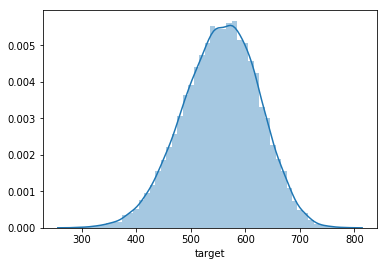

In [ ]:
sns.distplot(PISA_2009_noNA.target)

In [ ]:
# binarizo el outcome 'target'

PISA_2009_noNA['target'] = np.where(PISA_2009_noNA['target'] > 500,1,0)

PISA_2009_noNA['target'] = PISA_2009_noNA['target'].astype('object')

In [ ]:
PISA_2009_noNA.dtypes.value_counts()

object     217
float64     46
dtype: int64

DICE

In [ ]:
ver_var_probl = PISA_2009_noNA.loc[:,[col for col in PISA_2009_noNA if (PISA_2009_noNA[col].dtype=='float64') or (col=='target')]].iloc[:,11:31]
ver_var_probl
# columnas_PISA_2009[columnas_PISA_2009.index.isin([col for col in ver_var_probl.columns if col in (columnas_PISA_2009.index)])]

'''Alguna de estas (de la 11:31) es la responsable, o varias'''
ver_var_probl.describe()

BFMJ          BMMJ         GRADE         HISEI         LMINS  \
count  28346.000000  28346.000000  28346.000000  28346.000000  28346.000000   
mean      46.462534     46.723065     -0.012735     53.593629    241.680378   
std       16.804781     16.391362      0.493257     15.472254     87.683803   
min       16.000000     16.000000     -3.000000     16.000000      0.000000   
25%       33.000000     36.000000      0.000000     43.000000    180.000000   
50%       44.000000     45.000000      0.000000     53.000000    225.000000   
75%       56.000000     55.000000      0.000000     68.000000    275.000000   
max       90.000000     90.000000      3.000000     90.000000    960.000000   

              MMINS         SMINS      METASUM        UNDREM         PARED  \
count  28346.000000  28346.000000  28346.00000  28346.000000  28346.000000   
mean     236.243668    233.365836      0.29149      0.296689     13.824261   
std       86.880218    131.818477      0.89615      0.918765      2.709875   
min        0.000000      0.000000     -2.00980     -1.882400      3.000000   
25%      180.000000    150.000000     -0.33270     -0.416800     12.000000   
50%      225.000000    225.000000      0.50580      0.316000     14.500000   
75%      270.000000    300.000000      0.92500      1.048800     16.500000   
max     1000.000000   1000.000000      1.34430      1.415200     17.500000   

            ATTCOMP        ATSCHL        CSTRAT      CULTPOSS      DISCLIMA  \
count  28346.000000  28346.000000  28346.000000  28346.000000  28346.000000   
mean       0.103731      0.083709      0.212923      0.071892      0.120047   
std        0.924191      0.958274      0.934356      0.950679      0.977477   
min       -2.440500     -2.988700     -3.453100     -2.120700     -2.809100   
25%       -0.108000     -0.435200     -0.294500     -0.548100     -0.547300   
50%       -0.108000      0.018500      0.215900      0.105200      0.025800   
75%        0.860500      0.509100      0.782600      0.999000      0.927200   
max        0.860500      2.008500      2.504000      1.838000      1.837900   

            DIVREAD          ELAB        ENTUSE          ESCS        HEDRES  
count  28346.000000  28346.000000  28346.000000  28346.000000  28346.000000  
mean       0.111526      0.006059      0.029349      0.264140      0.216789  
std        0.879721      0.969888      0.878106      0.891042      0.865455  
min       -3.953100     -2.409800     -3.098000     -3.191100     -4.249900  
25%       -0.477000     -0.620800     -0.368900     -0.355800     -0.244600  
50%        0.140700      0.038500      0.152500      0.261650      0.165700  
75%        0.543600      0.603400      0.546900      0.941400      0.993300  
max        4.645700      2.757100      2.993400      3.094800      1.990600

In [ ]:
# PRUEBAS CON VARS CATEGORICAS TAMBIEN
'''ASI FUNCIONA, 243 variables'''

PISA_2009_junto = PISA_2009_noNA.copy()

PISA_2009_junto = PISA_2009_junto.drop(columns=ver_var_probl.columns)

print(PISA_2009_junto.shape)
print(PISA_2009_junto.dtypes.value_counts())
print(PISA_2009_junto.columns)

(28346, 243)
object     217
float64     26
dtype: int64
Index(['CNT', 'COUNTRY', 'OECD', 'ST03Q02', 'ST04Q01', 'ST05Q01', 'ST06Q01',
       'ST07Q01', 'ST07Q02', 'ST07Q03',
       ...
       'STIMREAD', 'STRSTRAT', 'STUDREL', 'USESCH', 'WEALTH', 'RFSINTRP',
       'RFSNCONT', 'RFSTRLIT', 'RFSFUMAT', 'target'],
      dtype='object', length=243)


In [ ]:
# preprocesamiento y clasificacion con DiCE

def prepro_DiCE(df,target,modo_prepro='todo'):
    
    if modo_prepro=='todo':
        df['split'] = np.random.uniform(0,1,len(df))
        vars_continuas = [col for col in df.columns if df[col].dtype=='float64']
        print(vars_continuas)

        d = dice_ml.Data(dataframe=df,
                 continuous_features=vars_continuas,
                 outcome_name=target)

        junto, _ = d.split_data(d.normalize_data(d.one_hot_encoded_data))
        print(junto.dtypes.value_counts())

        junto_train = junto[junto.split <= 0.75].drop(columns='split')
        X_train = junto_train.loc[:, junto_train.columns != target]
        y_train = junto_train.loc[:, [target]]
        y_train.loc[:,target] = y_train[target].astype('category')

        junto_test = junto[junto.split > 0.75].drop(columns='split')
        X_test = junto_test.loc[:, junto_test.columns != target]
        y_test = junto_test.loc[:, [target]]
        y_test.loc[:,target] = y_test[target].astype('category')

        print('shape X_train:', X_train.shape, 'y_train: ',y_train.shape)
        print('shape X_test:', X_test.shape, 'y_test: ',y_test.shape)

        return(d,X_train,y_train,X_test,y_test)
    
    else:
        
        df['split'] = np.random.uniform(0,1,len(df))
        train = df.copy()
        test = df.copy()
        train = train[train.split<0.75].drop(columns='split')
        test = test[test.split>=0.75].drop(columns='split')
        
        vars_continuas = [col for col in train.columns if train[col].dtype=='float64']
        print('Variables completas: ',vars_continuas)

        d = dice_ml.Data(dataframe=train,
                 continuous_features=vars_continuas,
                 outcome_name=target)
        
        train, _ = d.split_data(d.normalize_data(d.one_hot_encoded_data))
        X_train = train.loc[:, train.columns != target]
        y_train = train.loc[:, train.columns == target]
        y_train.loc[:,target] = y_train[target].astype('category')

        
        return(d,X_train,y_train)
    
    

def clasificacion_DiCE(preprocesar=False,modo_prepro='todo',modelar=False,df=[],
                       dfs=(),target='target',modelo='chico',verbose=1):
    
    # import DiCE
    import dice_ml
    from dice_ml.utils import helpers # helper functions
    # Tensorflow libraries
    import tensorflow as tf
    from tensorflow import keras
    # supress deprecation warnings from TF
    tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

    
    if preprocesar:
    
        if modo_prepro=='todo':
            # PREPRO DiCE
            d,X_train,y_train,X_test,y_test = prepro_DiCE(df,target,modo_prepro='todo')
        else:
            d,X_train,y_train = prepro_DiCE(df,target,modo_prepro='train')
    else:
        X_train,y_train,X_test,y_test = dfs
    
    
    if modelar:
    
        # RED NEURONAL

        if modelo=='chico':
            ann_model = keras.Sequential()
            ann_model.add(keras.layers.Dense(50, input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(15, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

            ann_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
            ann_model.fit(X_train.values,y_train.values, validation_split=0.15, epochs=5)

        else:
            ann_model = keras.Sequential()
            ann_model.add(keras.layers.Dense(2000, input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(800, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(200, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(20, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

            ann_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
            print(ann_model.summary())
            ann_model.fit(X_train.values,y_train.values, validation_split=0.15, epochs=10, verbose=verbose)

        if preprocesar:
            if modo_prepro=='todo':
                return(d,ann_model,X_train,y_train,X_test,y_test)
            else:
                return(d,ann_model,X_train,y_train)
        else:
            return(ann_model)
    
    else:
        if modo_prepro=='todo':
            return(d,X_train,y_train,X_test,y_test)
        else:
            return(d,X_train,y_train)

In [ ]:
d,ann_model,X_train,y_train = clasificacion_DiCE(
    preprocesar=True,modo_prepro='train',modelar=True,
    df=PISA_2009_junto,target='target',modelo='chico')

Variables completas:  ['ST03Q02', 'ST06Q01', 'ST28Q01', 'ST28Q02', 'ST28Q03', 'ST29Q01', 'ST29Q02', 'ST29Q03', 'ST30Q01', 'ST35Q01', 'AGE', 'HIGHCONF', 'HOMEPOS', 'JOYREAD', 'LIBUSE', 'MEMOR', 'ONLNREAD', 'STIMREAD', 'STRSTRAT', 'STUDREL', 'USESCH', 'WEALTH', 'RFSINTRP', 'RFSNCONT', 'RFSTRLIT', 'RFSFUMAT']


/Users/lucaspecina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Train on 14503 samples, validate on 2560 samples
Epoch 1/5
14503/14503 [==============================] - 3s 197us/sample - loss: 0.7540 - accuracy: 0.8025 - val_loss: 0.6508 - val_accuracy: 0.8082
Epoch 2/5
14503/14503 [==============================] - 2s 133us/sample - loss: 0.6098 - accuracy: 0.8184 - val_loss: 0.6127 - val_accuracy: 0.8230
Epoch 3/5
14503/14503 [==============================] - 2s 133us/sample - loss: 0.5877 - accuracy: 0.8240 - val_loss: 0.6241 - val_accuracy: 0.8109
Epoch 4/5
14503/14503 [==============================] - 2s 124us/sample - loss: 0.5750 - accuracy: 0.8254 - val_loss: 0.5726 - val_accuracy: 0.8242
Epoch 5/5
14503/14503 [==============================] - 2s 113us/sample - loss: 0.5664 - accuracy: 0.8327 - val_loss: 0.5669 - val_accuracy: 0.8309


In [ ]:
X_train.shape

(17063, 1982)

In [ ]:
'WEALTH' in X_train.columns

True

In [ ]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']) 

def metricas_evaluacion_clasif(modelo,X,y,tipo='test'):
    print('\n\n',tipo,'\n\n')
    predictions = modelo.predict(X)
    sns.distplot(predictions)
    y_probs = [round(x[0],3) for x in predictions]
    _, accuracy = modelo.evaluate(X, y)
    print('Accuracy con', tipo,': %.2f' % (accuracy*100))
    fpr, tpr, thresholds =roc_curve(y,y_probs)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    threshold = Find_Optimal_Cutoff(y,y_probs)
    print("El punto de corte optimo es ",threshold[0])
    y_pred = [1 if pred>threshold[0] else 0 for pred in y_probs]
    print();print('Confusion matrix: \n',confusion_matrix(y,y_pred))
    print('Accuracy: ',accuracy_score(y,y_pred))
    print('f1: ',f1_score(y,y_pred))
    print('recall: ',recall_score(y,y_pred))
    print('precision: ',precision_score(y,y_pred))
    

def df_con_predict(modelo,modo_prepro='todo',dfs=(),target='target'):
    
    if modo_prepro=='todo':
        X_train,y_train,X_test,y_test = dfs
    else:
        X_train,y_train = dfs
    
    # hacer dataframe con las instancias y resultados del modelo
    prediction_train = modelo.predict(X_train)

    train_pred = X_train.copy()
    train_pred = pd.concat([train_pred,y_train],axis='columns')
    train_pred['prediccion'] = prediction_train
    train_pred['tipo'] = 'train'
    
    if modo_prepro=='todo':
        prediction_test = modelo.predict(X_test)
        test_pred = X_test.copy()
        test_pred = pd.concat([test_pred,y_test],axis='columns')
        test_pred['prediccion'] = prediction_test
        test_pred['tipo'] = 'test'

        df_con_predicciones = pd.concat([
            train_pred , test_pred ])
    else:
        df_con_predicciones = train_pred.copy()
    
    df_con_predicciones['error'] = df_con_predicciones[target].astype('float64') - df_con_predicciones.prediccion
    df_con_predicciones['error_absoluto'] = np.abs(df_con_predicciones[target].astype('float64') - df_con_predicciones.prediccion)
    df_con_predicciones = round(df_con_predicciones,6)
    
    return(df_con_predicciones)



def evaluar_clasificador(modelo,modo_prepro='todo',dfs=(),target='target',graficar=False):
    
    if modo_prepro=='todo':
        X_train,y_train,X_test,y_test = dfs
        
        # TRAIN 
        metricas_evaluacion_clasif(modelo,X_train,y_train,'TRAIN')
        print('paso evaluacion train \n\n')

        # TEST
        metricas_evaluacion_clasif(modelo,X_test,y_test,'TEST')
        print('paso evaluacion test \n\n')
        
        # hacer dataframe con las instancias y resultados del modelo
        df_con_predicciones = df_con_predict(modelo,modo_prepro='todo',dfs=dfs,target=target)
        
    else:
        X_train,y_train = dfs
        
        # TRAIN 
        metricas_evaluacion_clasif(modelo,X_train,y_train,'TRAIN')
        print('paso evaluacion train \n\n')
        
        # hacer dataframe con las instancias y resultados del modelo
        df_con_predicciones = df_con_predict(modelo,modo_prepro='train',dfs=dfs,target=target)
    
    
    # GRAFICAR
    if graficar:
        import plotly.express as px
        fig = px.violin(df_con_predicciones, y='prediccion',color=target,
                 violinmode='overlay')
        fig.show()
    
    
    return(df_con_predicciones)

    



 TRAIN 


17063/17063 [==============================] - 1s 81us/sample - loss: 0.5448 - accuracy: 0.8406
Accuracy con TRAIN : 84.06
Area under the ROC curve : 0.874809
El punto de corte optimo es  0.7540000081062317

Confusion matrix: 
 [[ 2922   779]
 [ 2834 10528]]
Accuracy:  0.7882552892222938
f1:  0.8535408812679881
recall:  0.7879060020954947
precision:  0.931104625453259
paso evaluacion train 




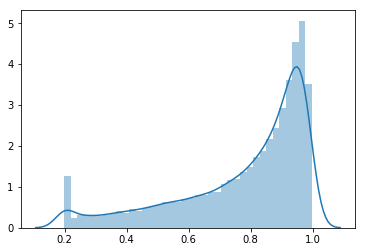

In [ ]:
# evaluar modelo de arriba

df_con_predicciones = evaluar_clasificador(ann_model,modo_prepro='train',
                        dfs=(X_train,y_train),target='target',graficar=True)

In [ ]:
df_con_predicciones[['target','tipo','prediccion','error','error_absoluto']].sort_values('prediccion',ascending=False)

target   tipo  prediccion     error  error_absoluto
42555       1  train    0.997779  0.002221        0.002221
39036       1  train    0.997491  0.002509        0.002509
39391       1  train    0.997444  0.002556        0.002556
37165       1  train    0.997373  0.002627        0.002627
38739       1  train    0.996997  0.003003        0.003003
...       ...    ...         ...       ...             ...
26392       0  train    0.197882 -0.197882        0.197882
80767       0  train    0.197882 -0.197882        0.197882
203616      0  train    0.197882 -0.197882        0.197882
106274      0  train    0.197882 -0.197882        0.197882
24953       0  train    0.197882 -0.197882        0.197882

[17063 rows x 5 columns]

In [ ]:
# # save model and architecture to single file
# ann_model.save("/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA_2009/ann_model1.h5")
# print("Saved model to disk")

In [ ]:
# # load and evaluate a saved model
# from numpy import loadtxt

# import tensorflow as tf 
# loaded_model = tf.keras.models.load_model('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA_2009/ann_model1.h5')
# # summarize model.
# loaded_model.summary()

ECF

In [ ]:
backend = 'TF'+tf.__version__[0] 
m = dice_ml.Model(model=ann_model, backend=backend)

# initiate DiCE
exp = dice_ml.Dice(d, m)

In [ ]:
# agarrar una instancia del conjunto de entrenamiento

# df_con_predicciones[(df_con_predicciones.WEALTH>-0.01) &
#                     (df_con_predicciones.WEALTH<0.01)].sort_values('prediccion').head(20)

df_con_predicciones[df_con_predicciones.prediccion < 0.5].\
        sort_values('WEALTH').head(10)[['WEALTH','prediccion','target']]

WEALTH  prediccion target
194790  0.000000    0.452875      1
362075  0.035973    0.197886      0
204081  0.096014    0.252299      0
94554   0.123045    0.452497      0
361444  0.147627    0.370688      0
194144  0.159871    0.401176      0
194864  0.159871    0.392291      1
453240  0.164552    0.240552      0
409112  0.174982    0.284281      0
105803  0.190202    0.254712      0

In [ ]:
indiv = 453240

# ver que son las columnas que quedaron
pd.concat([columnas_PISA_2009[columnas_PISA_2009.index.isin([col for col in PISA_2009_junto.columns if col in (columnas_PISA_2009.index)])]  ,  PISA_2009_junto.loc[indiv,:]],axis='columns')



x  \
CNT                                Country code 3-character   
COUNTRY                            Country code ISO 3-digit   
OECD                                           OECD country   
ST03Q02                                         Birth Month   
ST04Q01                                                 Sex   
ST05Q01                                    Attend <ISCED 0>   
ST06Q01                                    Age at <ISCED 1>   
ST07Q01                                    Repeat <ISCED 1>   
ST07Q02                                    Repeat <ISCED 2>   
ST07Q03                                    Repeat <ISCED 3>   
ST08Q01                                    At Home - Mother   
ST08Q02                                    At Home - Father   
ST08Q03                                  At Home - Brothers   
ST08Q04                                   At Home - Sisters   
ST08Q05                              At Home - Grandparents   
ST08Q06                                    At Home - Others   
ST09Q01                                   Mother Occupation   
ST10Q01                         Mother  <Highest Schooling>   
ST11Q01                                    Mother <ISCED 6>   
ST11Q02                                    Mother <ISCED5A>   
ST11Q03                                    Mother <ISCED5B>   
ST11Q04                                     Mother <ISCED4>   
ST12Q01                           Mother Current Job Status   
ST13Q01                                   Father Occupation   
ST14Q01                         Father  <Highest Schooling>   
ST15Q01                                    Father <ISCED 6>   
ST15Q02                                   Father <ISCED 5A>   
ST15Q03                                   Father <ISCED 5B>   
ST15Q04                                    Father <ISCED 4>   
ST16Q01                           Father Current Job Status   
ST17Q01                               Country of birth Self   
ST17Q02                             Country of birth Mother   
ST17Q03                             Country of birth Father   
ST19Q01                                    Language at home   
ST20Q01                                    Possessions desk   
ST20Q02                                Possessions own room   
ST20Q03                             Possessions study place   
ST20Q04                               Possessions  computer   
ST20Q05                                Possessions software   
ST20Q06                                Possessions Internet   
ST20Q07                              Possessions literature   
ST20Q08                                  Possessions poetry   
ST20Q09                                     Possessions art   
ST20Q10                               Possessions textbooks   
ST20Q11             Possessions <technical reference books>   
ST20Q12                              Possessions dictionary   
ST20Q13                              Possessions dishwasher   
ST20Q14                                   Possessions <DVD>   
ST20Q15                          Possessions <Cntry item 1>   
ST20Q16                          Possessions <Cntry item 2>   
ST20Q17                          Possessions <Cntry item 3>   
ST21Q01                            How many cellular phones   
ST21Q02                                How many televisions   
ST21Q03                                  How many computers   
ST21Q04                                       How many cars   
ST21Q05                       How many rooms bath or shower   
ST22Q01                              How many books at home   
ST23Q01                              Reading Enjoyment Time   
ST24Q01                   Read Attitude - Only if I have to   
ST24Q02                   Read Attitude - Favourite hobbies   
ST24Q03                    Read Attitude - Talk about books   
ST24Q04                      Read Attitude - Hard to finish   
ST24Q05                    Read Attitude - Happy as present   
ST24Q06                   

In [ ]:
vars_decision = ['IMMIG','ISCEDO','HIGHCONF','HOMEPOS','JOYREAD','LIBUSE','MEMOR',
                 'ONLNREAD','STIMREAD','STRSTRAT','STUDREL','USESCH','WEALTH',
                'RFSINTRP','RFSNCONT','RFSTRLIT','RFSFUMAT']

len(vars_decision)

17

In [ ]:
query_instance = PISA_2009_junto.drop(columns=['target','split']).loc[indiv,:]
query_instance = query_instance.to_dict()

print(len(query_instance))
query_instance

242


{'CNT': 'Trinidad and Tobago',
 'COUNTRY': 'Trinidad and Tobago',
 'OECD': 'Non-OECD',
 'ST03Q02': 12.0,
 'ST04Q01': 'Male',
 'ST05Q01': 'Yes, more than one year',
 'ST06Q01': 4.0,
 'ST07Q01': 'No, never',
 'ST07Q02': 'No, never',
 'ST07Q03': 'No, never',
 'ST08Q01': 'No',
 'ST08Q02': 'No',
 'ST08Q03': 'No',
 'ST08Q04': 'No',
 'ST08Q05': 'Yes',
 'ST08Q06': 'Yes',
 'ST09Q01': 'Bookbinders Etc Workers',
 'ST10Q01': '<ISCED level 3A>',
 'ST11Q01': 'No',
 'ST11Q02': 'No',
 'ST11Q03': 'No',
 'ST11Q04': 'No',
 'ST12Q01': 'Working Part-Time',
 'ST13Q01': 'Heavy Truck & Lorry Drivers',
 'ST14Q01': '<ISCED level 1>',
 'ST15Q01': 'No',
 'ST15Q02': 'No',
 'ST15Q03': 'No',
 'ST15Q04': 'No',
 'ST16Q01': 'Working Part-Time',
 'ST17Q01': 'Country of test',
 'ST17Q02': 'Country of test',
 'ST17Q03': 'Country of test',
 'ST19Q01': 'Language of test',
 'ST20Q01': 'No',
 'ST20Q02': 'No',
 'ST20Q03': 'No',
 'ST20Q04': 'No',
 'ST20Q05': 'No',
 'ST20Q06': 'No',
 'ST20Q07': 'No',
 'ST20Q08': 'No',
 'ST20Q09'

In [ ]:
# generate counterfactuals
dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, 
                    desired_class="opposite",verbose=1,
    proximity_weight=1.5, diversity_weight=1.0,features_to_vary=vars_decision,
    max_iter=3,stopping_threshold=0.84,
    init_near_query_instance=True)

/Users/lucaspecina/anaconda3/lib/python3.7/site-packages/dice_ml/dice_interfaces/dice_tensorflow2.py:147: RuntimeWarning:

divide by zero encountered in double_scalars



InvalidArgumentError: Input is not invertible. [Op:MatrixInverse]

In [ ]:
# visualize the resutls
dice_exp.visualize_as_dataframe()

### Heart attack

Ahora se realizará el procedimiento de ECF para un dataset de ataques al corazon. Este tendrá la importancia de captar las diferencias individuales para la recomendacion de acciones para reducir la probabilidad de ataques al corazon.

https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

# 6- Conclusiones y otras aplicaciones


In [ ]:
'''para mostrar toma de decisiones (ejemplo de no linealidad): Captar la situacion en la que, subir el valor de una variable mejora para un individuo pero para otro empeora. Con eso vemos el potencial de captar las no linealidades y hacerlo a nivel individual.'''

'para mostrar toma de decisiones (ejemplo de no linealidad): Captar la situacion en la que, subir el valor de una variable mejora para un individuo pero para otro empeora. Con eso vemos el potencial de captar las no linealidades y hacerlo a nivel individual.'